# Data Exploration and Visualization

In this notebook we will focus on basic feature exploration and visualization of the train dataset.
<br>We will explore the distribution of the different features in the dataset and their correlations, especially with the target variable (deal_probability).</br>
<br>We will also check for missing values and try to understand which features are numerical and which are categorical.</br>
<br>Finally we will do a bit of exploration of the other datasets we received (the periods and active datasets) and try to understand the relation between the train and test datasets.</br>

## 1. Train Dataset Exploration
### 1.1 Basic Feature Exploration
1.1.1 User Id<br/>
1.1.2 User Type<br/>
1.1.3 Region<br/>
1.1.4 City<br/>
1.1.5 Categories<br/>
1.1.6 Parent Categories<br/>
1.1.7 Image Top 1<br/>
1.1.8 Dates<br/>
1.1.9 Item Seq Number<br/>
1.1.10 Price<br/>
1.1.11 Params<br/>
1.1.12 Missing Values<br/>
### 1.2.Feature Correlation
1.2.1 Pearson,Spearman,Kendall-tau<br/>
1.2.2 Mutual Information
### 1.3.Deal Classes
## 2. Train Active Dataset Exploration
## 3. Periods Train Dataset Exploration
## 4. Relation Between Train And Test Datasets

### Basic configurations:

In [104]:
import os
import os.path
import pandas as pd
import numpy as np
import datetime
import matplotlib
import pickle
import json
import googlemaps
import plotly
import plotly.plotly as py
from plotly.graph_objs import *
import seaborn as sns
from matplotlib import pyplot as plt
import transliterate as ts
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from compute_util import load_data
%matplotlib inline

In [105]:
mapbox_access_token = open('./helper_data/mapbox_token.txt', 'r').read()
matplotlib.rcParams['figure.figsize'] = (14.0, 7.0)

In [106]:
DATA_PATH = './data'
HELPER_DATA_PATH = './helper_data'

### Data loading:

In [107]:
train = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'), parse_dates=['activation_date'])

In [108]:
test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'), parse_dates=['activation_date'])

### Translation:

The data is written in Russian, so we translated some of the text to English for visualization pruposes.

In [109]:
for col_name in ['parent_category_name', 'category_name', 'param_1', 'param_2', 'param_3']:
    trans_dict = json.load(open(HELPER_DATA_PATH + '//' + col_name + '_en.json', 'r'))
    train[col_name + '_en'] = train[col_name].apply(lambda t: trans_dict[t] if not pd.isnull(t) else t)

# train.csv

## Basic Feature Exploration

In [110]:
train.shape

(1000, 24)

In [111]:
train.columns

Index(['Unnamed: 0', 'item_id', 'user_id', 'region', 'city',
       'parent_category_name', 'category_name', 'param_1', 'param_2',
       'param_3', 'title', 'description', 'price', 'item_seq_number',
       'activation_date', 'user_type', 'image', 'image_top_1',
       'deal_probability', 'parent_category_name_en', 'category_name_en',
       'param_1_en', 'param_2_en', 'param_3_en'],
      dtype='object')

In [112]:
train.head(10)

,Unnamed: 0,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,...,activation_date,user_type,image,image_top_1,deal_probability,parent_category_name_en,category_name_en,param_1_en,param_2_en,param_3_en
0,0,b912c3c6a6ad,e00f8ff2eaf9,Свердловская область,Екатеринбург,Личные вещи,Товары для детей и игрушки,Постельные принадлежности,NaN,NaN,...,2017-03-28,Private,d10c7e016e03247a3bf2d13348fe959fe6f436c1caf64c...,1008.0,0.12789,Personal things,Goods for children and toys,Bed dress,NaN,NaN
1,1,2dac0150717d,39aeb48f0017,Самарская область,Самара,Для дома и дачи,Мебель и интерьер,Другое,NaN,NaN,...,2017-03-26,Private,79c9392cc51a9c81c6eb91eceb8e552171db39d7142700...,692.0,0.00000,For home and cottages,Furniture and interior,Other,NaN,NaN
2,2,ba83aefab5dc,91e2f88dd6e3,Ростовская область,Ростов-на-Дону,Бытовая электроника,Аудио и видео,"Видео, DVD и Blu-ray плееры",NaN,NaN,...,2017-03-20,Private,b7f250ee3f39e1fedd77c141f273703f4a9be59db4b48a...,3032.0,0.43177,Consumer electronics,Audio and video,"Video, DVD and Blu-ray players",NaN,NaN
3,3,02996f1dd2ea,bf5cccea572d,Татарстан,Набережные Челны,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,...,2017-03-25,Company,e6ef97e0725637ea84e3d203e82dadb43ed3cc0a1c8413...,796.0,0.80323,Personal things,Goods for children and toys,Car seats,NaN,NaN
4,4,7c90be56d2ab,ef50846afc0b,Волгоградская область,Волгоград,Транспорт,Автомобили,С пробегом,ВАЗ (LADA),2110,...,2017-03-16,Private,54a687a3a0fc1d68aed99bdaaf551c5c70b761b16fd0a2...,2264.0,0.20797,Transport,Cars,With mileage,VAZ (LADA),2110
5,5,51e0962387f7,bbfad0b1ad0a,Татарстан,Чистополь,Личные вещи,Товары для детей и игрушки,Автомобильные кресла,NaN,NaN,...,2017-03-28,Private,eb6ad1231c59d3dc7e4020e724ffe8e4d302023ddcbb99...,796.0,0.80323,Personal things,Goods for children and toys,Car seats,NaN,NaN
6,6,c4f260a2b48a,08f469d2e6f7,Нижегородская область,Нижний Новгород,Для дома и дачи,Ремонт и строительство,Сантехника и сауна,NaN,NaN,...,2017-03-23,Private,0330f6ac561f5db1fa8226dd5e7e127b5671d44d075a98...,2823.0,0.00000,For home and cottages,Repair and construction,Plumbing and sauna,NaN,NaN
7,7,6b71309d6a8a,fef86baa002c,Пермский край,Пермь,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Джинсы,26,...,2017-03-25,Private,9bab29a519e81c14f4582024adfebd4f11a4ac71d323a6...,567.0,0.80323,Personal things,"Clothes, shoes, accessories",Women&#39;s clothing,Jeans,26
8,8,c5b969cb63a2,055825270190,Оренбургская область,Оренбург,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Платья и юбки,> 50 (XXL),...,2017-03-17,Private,75ce06d1f939a31dfb2af8ac55f08fa998fa336d13ee05...,415.0,0.00000,Personal things,"Clothes, shoes, accessories",Women&#39;s clothing,Dresses and skirts,&gt; 50 (XXL)
9,9,b1570962e68c,f9e8f831d94c,Нижегородская область,Нижний Новгород,Личные вещи,Детская одежда и обувь,Для девочек,Обувь,25,...,2017-03-22,Company,54fb8521135fda77a860bfd2fac6bf46867ab7c06796e3...,46.0,0.00000,Personal things,Children&#39;s clothing and footwear,For girls,Footwear,25


### User Id

Let's check the distribution of the user_id feature:

In [113]:
print(train.user_id.value_counts(),train.user_id.value_counts().describe(),sep = "\n\n")

4b1f0d152f9f    2
8d85d7ecdb79    2
f9b12b3fb49f    2
838f7b83a6ac    1
a072669fe34b    1
ee1cc4641454    1
4cc5616cea61    1
f12f66de31ae    1
68ee0dc56c28    1
98c6a9905269    1
400718c97773    1
c0083e939cb4    1
5646036467ec    1
673f94f3afd1    1
1bd8d66c6810    1
4efa519392fd    1
88fb04557377    1
9e0056ae9ed3    1
5fa80f968e31    1
e150e1bbb821    1
df6b93da3cfc    1
3280f18cefa5    1
172dce67e5d9    1
1e44737cd285    1
650b5af1ac9d    1
ee87bd79fd12    1
c5c4c6e67628    1
c08b81f2a515    1
43bddbfc05cf    1
969e32cb64bd    1
               ..
415b388e0028    1
055825270190    1
3022d634e51e    1
b5fd1f941e0b    1
33c1c715442c    1
6883d2ccf220    1
4151658d66c6    1
5cb76d050ee5    1
1fa389336ea0    1
c9e14918bbc3    1
38ffbcd9e7c6    1
c540641e9b82    1
69a12fa3718c    1
1788ccc7a532    1
1e10461bfca7    1
4cc70c45efc5    1
228a15ca6203    1
442b2d156972    1
67649360efcc    1
79c29e1e9f20    1
856131db4552    1
fc9a38b79414    1
fe5bcb70eda1    1
b990f6744c3c    1
2879866552

Most users appear once or twice, but we have some outliers that we might want to further explore.
Let's check the distribution of the target variable as a functions of the user count:

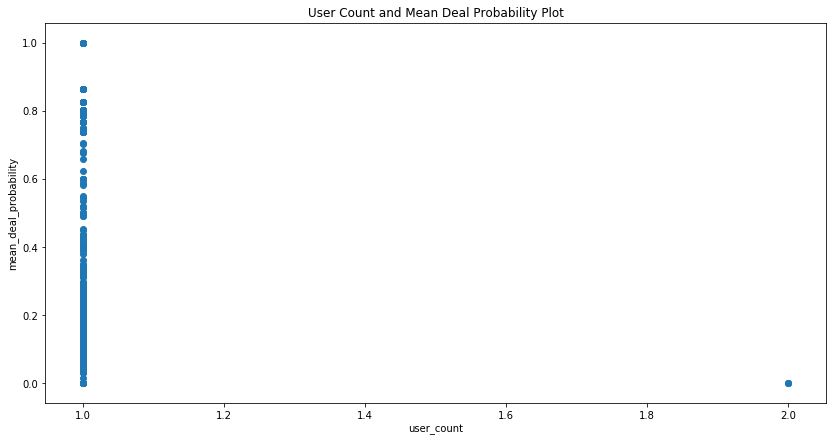

In [114]:
check = train[['user_id','deal_probability']]
user_mean = check.groupby('user_id').mean()
user_mean = user_mean.rename(columns = {'deal_probability' : 'mean_deal_probability'})
user_count = check.groupby('user_id').count()
user_count = user_count.rename(columns = {'deal_probability' : 'user_count'})
new_df = user_mean.join(user_count)
plt.scatter(new_df['user_count'], new_df['mean_deal_probability'])
plt.title("User Count and Mean Deal Probability Plot")
plt.xlabel("user_count")
plt.ylabel("mean_deal_probability")
plt.show()

We can see that there is no obvious correlation between them. Let's confirm that assumption:

In [115]:
print(new_df.corr())
print(new_df.corr('spearman'))
print(new_df.corr('kendall'))

                       mean_deal_probability  user_count
mean_deal_probability               1.000000   -0.030551
user_count                         -0.030551    1.000000
                       mean_deal_probability  user_count
mean_deal_probability               1.000000   -0.040431
user_count                         -0.040431    1.000000
                       mean_deal_probability  user_count
mean_deal_probability               1.000000   -0.036902
user_count                         -0.036902    1.000000


We might gain insights from exploring users that has several ads and their mean deal probability is really low or really high.
<br>We can search for power users and weak users:</br>
<br>Power Users - users with more than 10 ads, and mean deal probability >= 0.4</br>
<br>Weak Users - users with more than 10 ads, and mean deal probability <= 0.05</br>

In [116]:
power_users = new_df[(new_df.mean_deal_probability >= 0.4) & (new_df.user_count > 10) ]
print(power_users.sort_values(by = 'mean_deal_probability' , ascending = False).head(10))
weak_users = new_df[(new_df.mean_deal_probability <=0.05) & (new_df.user_count > 10) ]
print(weak_users.sort_values(by = 'mean_deal_probability' , ascending = True).head(10))

Empty DataFrame
Columns: [mean_deal_probability, user_count]
Index: []
Empty DataFrame
Columns: [mean_deal_probability, user_count]
Index: []


Then add a boolean feature for them:

In [117]:
index_1 = list(power_users.index)
train['is_power_user'] = np.isin(train['user_id'], index_1)
print("Number of power users:")
print(train[train['is_power_user'] == True].shape[0]/ train.shape[0]*100)

Number of power users:
0.0


In [118]:
index_2 = list(weak_users.index)
train['is_weak_user'] = np.isin(train['user_id'], index_2)
print("Number of weak users:")
print(train[train['is_weak_user'] == True].shape[0]/ train.shape[0]*100)

Number of weak users:
0.0


### User Type

Let's check the distribution of the user_type feature:

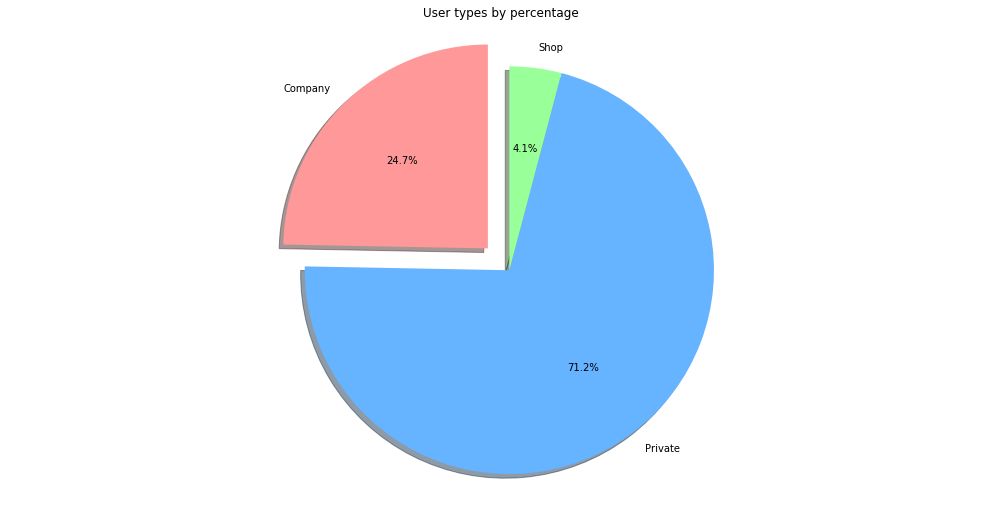

In [119]:
user_type_dist = train.groupby('user_type').size()
explode = (0.15, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = user_type_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(user_type_dist, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('User types by percentage')
plt.show()

Let's check the distribution of the user_type feature for power and weak users:

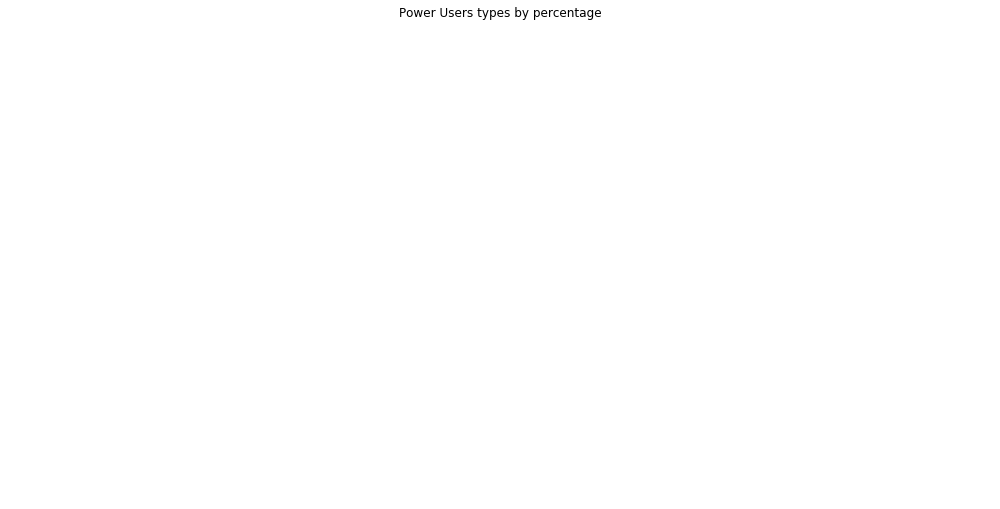

In [120]:
check = train[['user_id', 'user_type']]
check.set_index('user_id', inplace = True)
user_type_dist = power_users.join(check).groupby('user_type').size()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = user_type_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(user_type_dist, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('Power Users types by percentage')
plt.show()

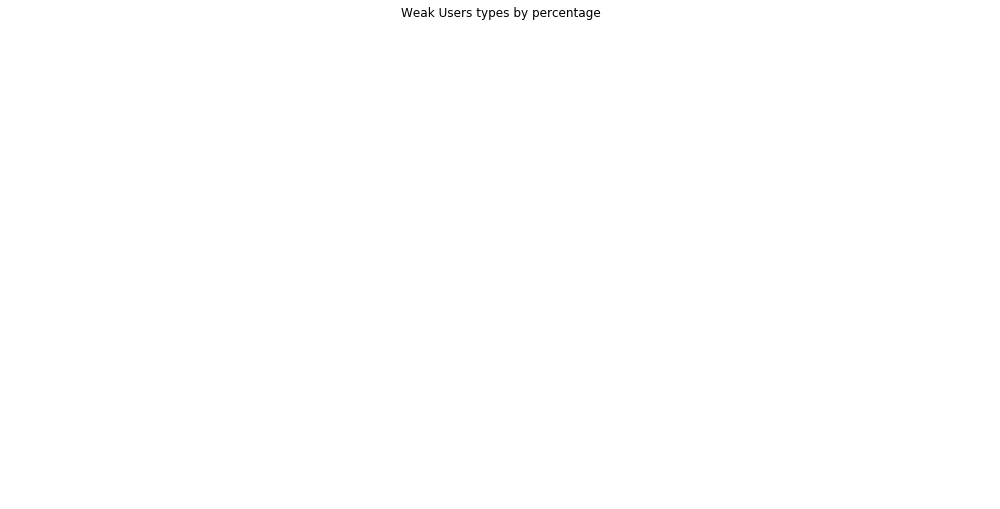

In [122]:
check = train[['user_id', 'user_type']]
check.set_index('user_id', inplace = True)
user_type_dist = weak_users.join(check).groupby('user_type').size()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = user_type_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(user_type_dist, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('Weak Users types by percentage')
plt.show()

Let's view the mean deal probability for each user type:

In [123]:
print(train.groupby('user_type')['deal_probability'].mean())

user_type
Company    0.113842
Private    0.164099
Shop       0.062257
Name: deal_probability, dtype: float64


We can see that over 70% of the items are from private users.
Also, shops have only 5% of the items and their deal_probability is significantly low.
We can also see that the 'power users' we found have a significantly different user_type distribution - almost 50% of them are companies and 25% of them are shops.
The 'weak users' also have different distribution - 37% of them are comapnies,37% of them are private and 25% are shops.

### Region

First let's check how many regions we have:

In [124]:
print('Number of regions:', train['region'].nunique())

Number of regions: 28


Now let's explore the distribution of the target feature and the price by each region: 

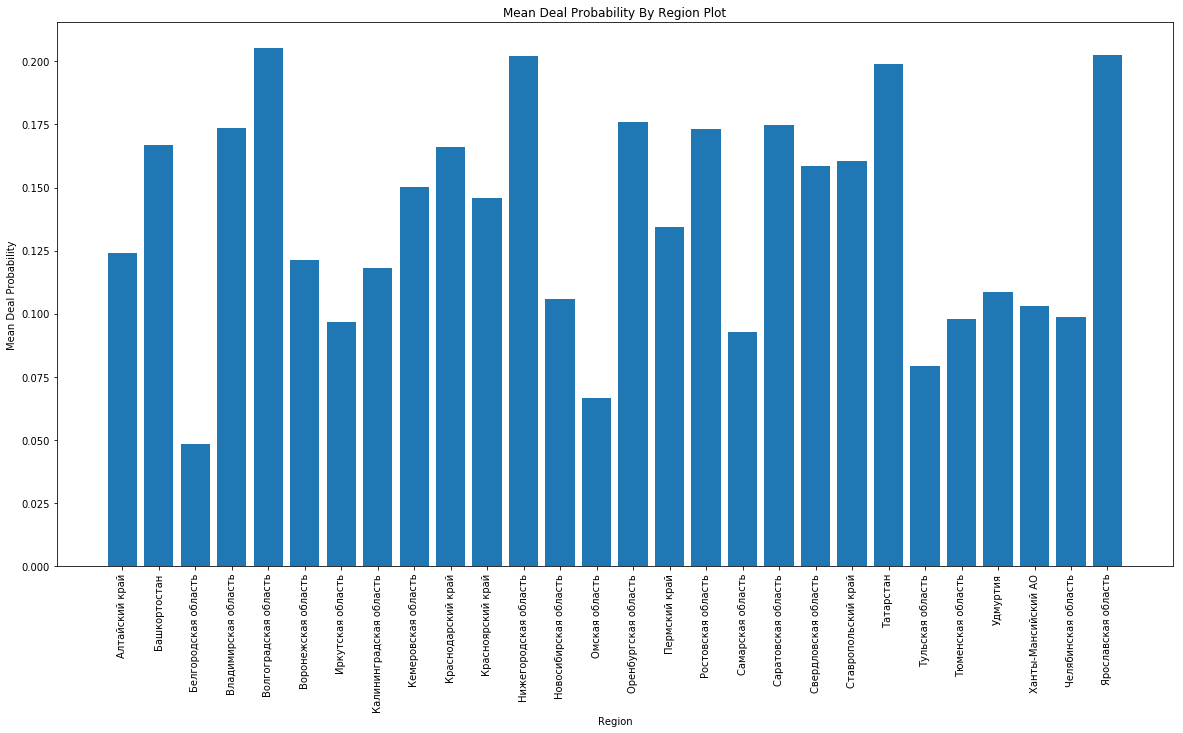

In [125]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
mean_deal_prob = train.groupby('region')['deal_probability'].mean()
plt.xticks(rotation=90)
plt.bar(mean_deal_prob.index, mean_deal_prob.values)
plt.title('Mean Deal Probability By Region Plot')
plt.xlabel('Region')
plt.ylabel('Mean Deal Probability')
plt.show()

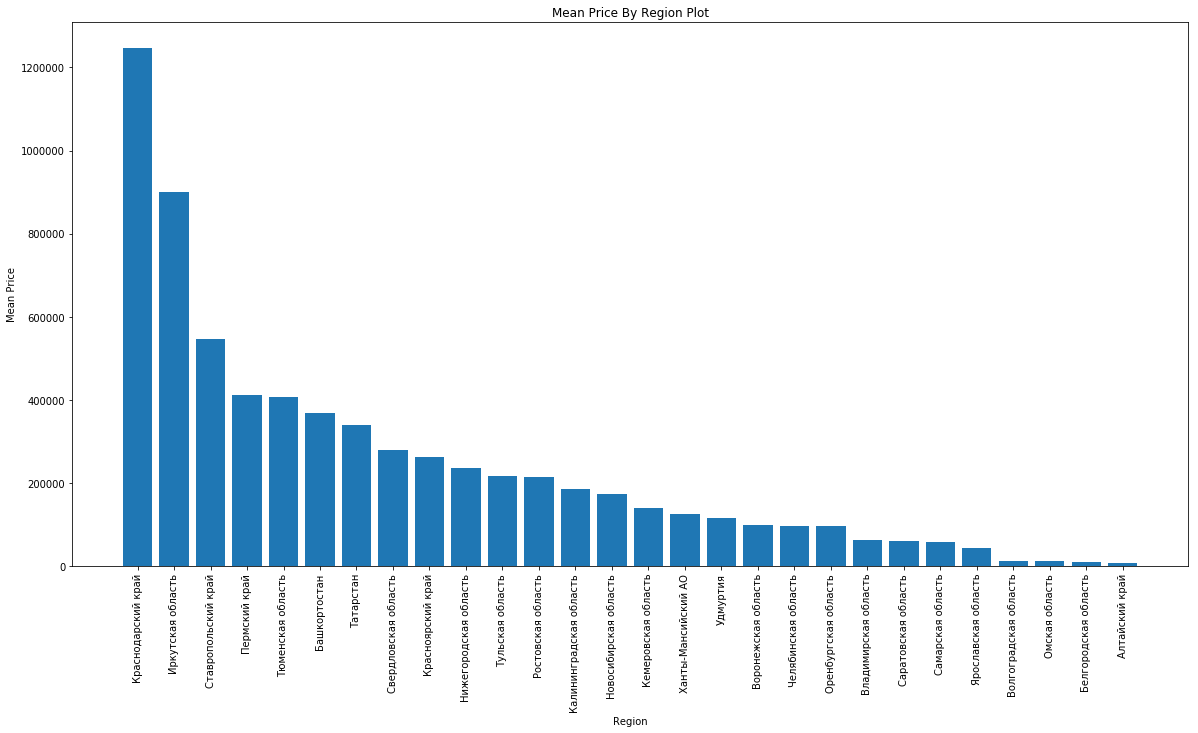

In [126]:
mean_price = train.groupby('region')['price'].mean().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(mean_price.index, mean_price.values)
plt.title('Mean Price By Region Plot')
plt.xlabel('Region')
plt.ylabel('Mean Price')
plt.show()

#### Top 3 regions by mean_price:

In [127]:
print(mean_price.head(3))

region
Краснодарский край     1.246116e+06
Иркутская область      9.004923e+05
Ставропольский край    5.463568e+05
Name: price, dtype: float64


We can see that there isn't much of a connection between the region and the deal probabilty.
<br>We also see that there are 2 regions with really high mean_price in comparison to the other regions.</br>

### City

Let's make the same exploration we did for the 'region' feature:

In [128]:
print('Number of cities:', train['city'].nunique())

Number of cities: 190


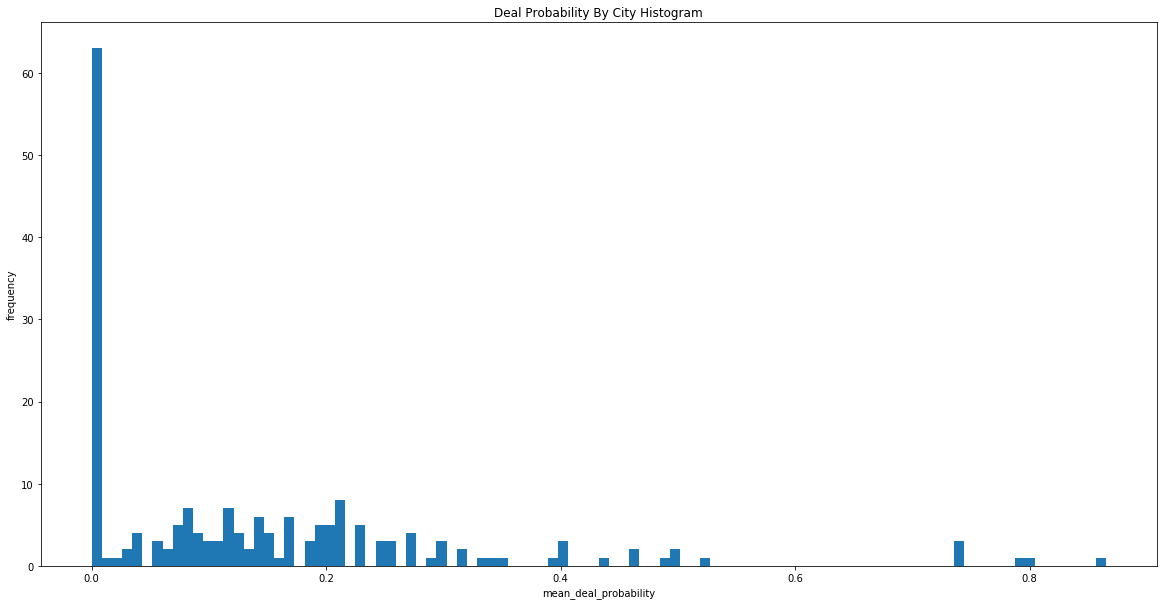

In [129]:
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
mean_deal_prob = train.groupby('city')['deal_probability'].mean().sort_values(ascending=False)
plt.hist(mean_deal_prob, bins = 100)
plt.title("Deal Probability By City Histogram")
plt.xlabel("mean_deal_probability")
plt.ylabel("frequency")
plt.show()

#### Top 5 cities by mean_deal_probablility:

In [130]:
print(mean_deal_prob.head(5))

city
Тбилисская    0.86520
Чистополь     0.80323
Тоцкое        0.78995
Володарск     0.73760
Воткинск      0.73760
Name: deal_probability, dtype: float64


We found some cities with really high deal_probability.
<br>Let's check if there are cities with high probability and at least 10 itmes:</br>

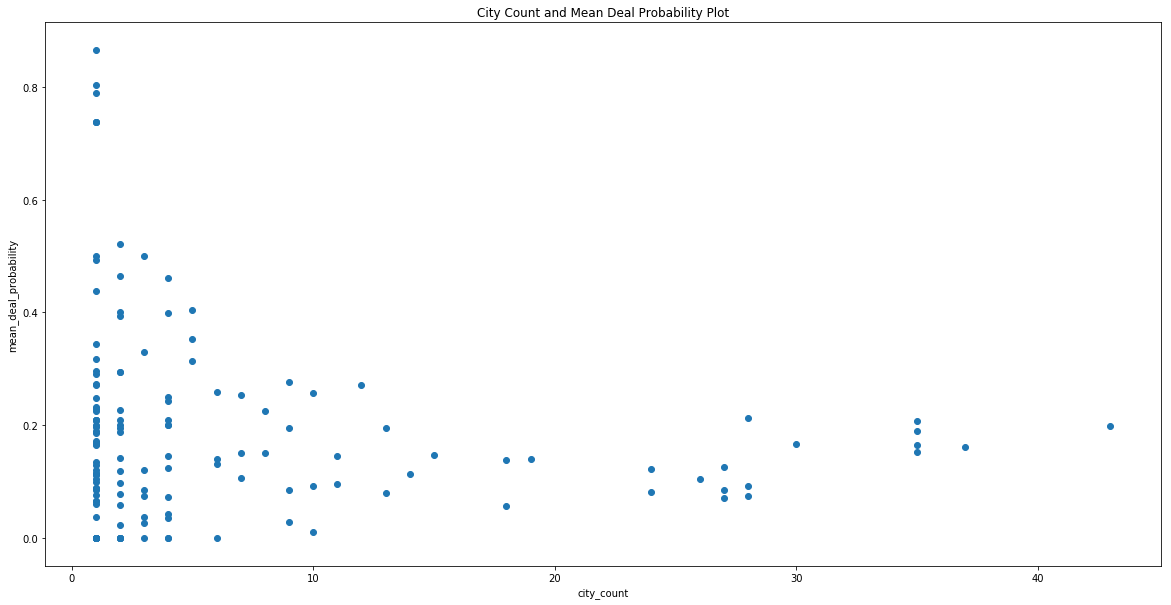

In [131]:
check = train[['city','deal_probability']]
city_mean = check.groupby('city').mean()
city_mean = city_mean.rename(columns = {'deal_probability' : 'mean_deal_probability'})
city_count = check.groupby('city').count()
city_count = city_count.rename(columns = {'deal_probability' : 'city_count'})
new_df = city_mean.join(city_count)
plt.scatter(new_df['city_count'], new_df['mean_deal_probability'])
plt.title("City Count and Mean Deal Probability Plot")
plt.xlabel("city_count")
plt.ylabel("mean_deal_probability")
plt.show()

In [132]:
outliers = new_df[(new_df.mean_deal_probability >= 0.4) & (new_df.city_count > 10) ]
print(outliers.sort_values(by = 'mean_deal_probability' , ascending = False))

Empty DataFrame
Columns: [mean_deal_probability, city_count]
Index: []


We can see that there aren't any interesting cities (by our definition)

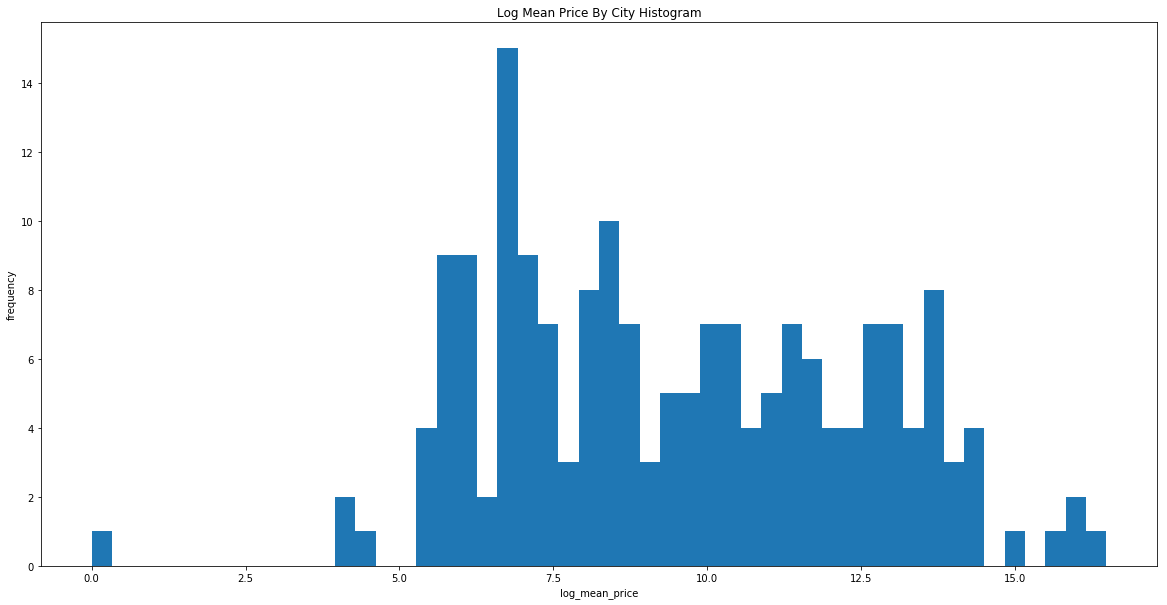

In [133]:
mean_price = train.groupby('city')['price'].mean().sort_values(ascending=False)
mean_price.dropna(inplace = True)
log_mean_price = np.log(mean_price)
plt.hist(log_mean_price, bins = 50)
plt.title("Log Mean Price By City Histogram")
plt.xlabel("log_mean_price")
plt.ylabel("frequency")
plt.show()

#### Top 5 cities by log_mean_price:

In [134]:
print(log_mean_price.head(5))

city
Новороссийск    16.482811
Донское         15.955577
Арамиль         15.856731
Монетный        15.590463
Ангарск         14.915851
Name: price, dtype: float64


We can see that the log of the mean price histogram is close to a normal distribution (with mean = 12.5)

### Categories

Let's check the distribution of items, price and deal probability amongst the different categories:

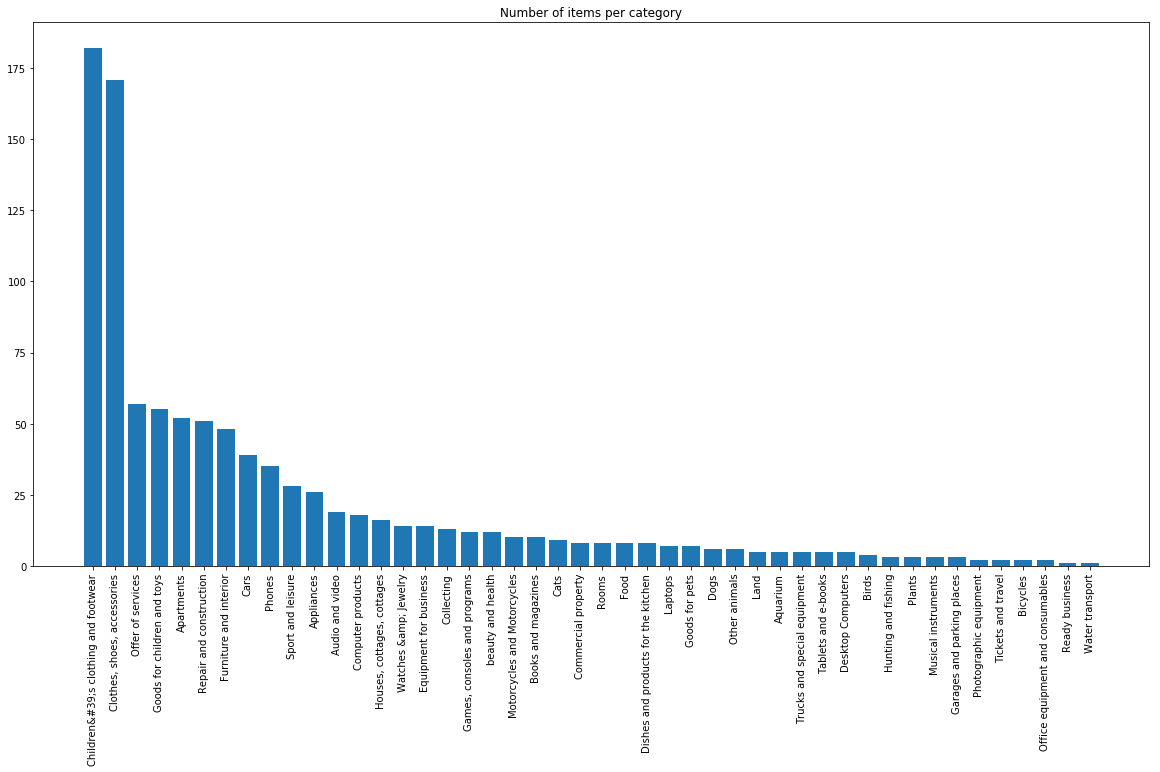

In [135]:
category_counts = train.groupby('category_name_en')['item_id'].count().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(category_counts.index, category_counts.values)
plt.title('Number of items per category')
plt.show()

#### Top 5 categories by count:

In [136]:
print(category_counts.head(5))

category_name_en
Children&#39;s clothing and footwear    182
Clothes, shoes, accessories             171
Offer of services                        57
Goods for children and toys              55
Apartments                               52
Name: item_id, dtype: int64


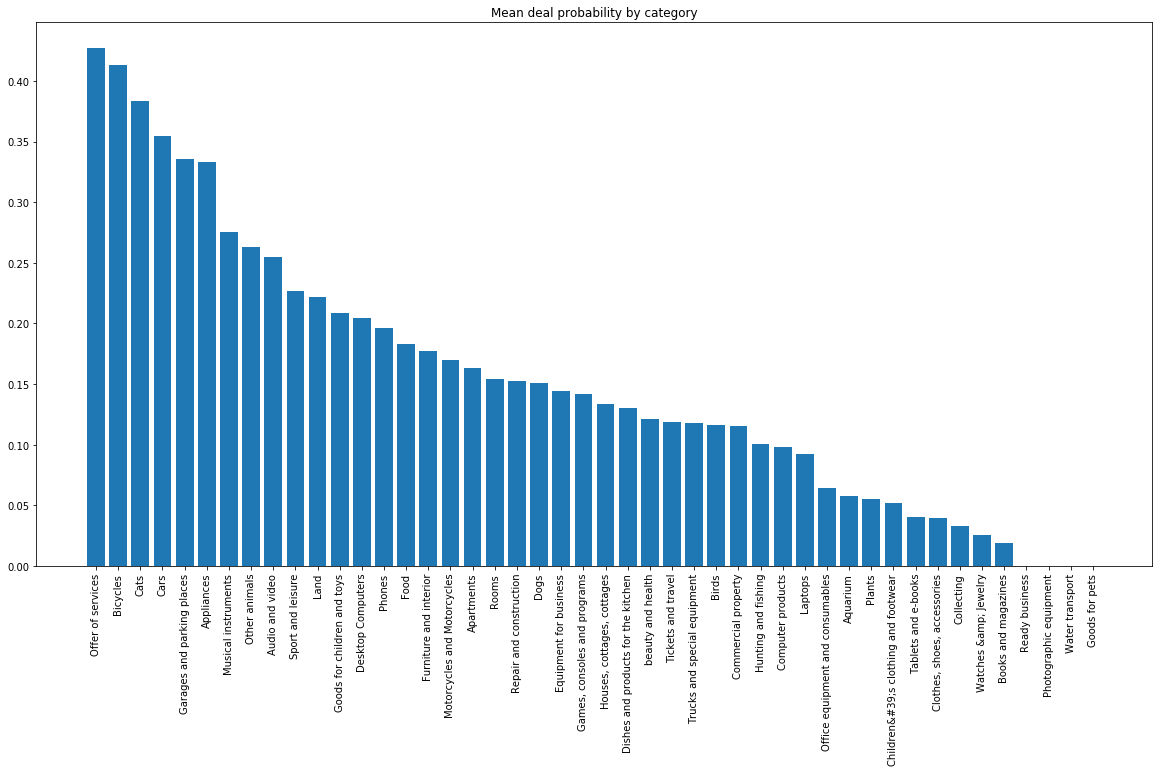

In [137]:
mean_deal_prob = train.groupby('category_name_en')['deal_probability'].mean().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(mean_deal_prob.index, mean_deal_prob.values)
plt.title('Mean deal probability by category')
plt.show()

#### Top 5 categories by mean_deal_probability:

In [138]:
print(mean_deal_prob.head(5))

category_name_en
Offer of services             0.426984
Bicycles                      0.413340
Cats                          0.383654
Cars                          0.354880
Garages and parking places    0.335453
Name: deal_probability, dtype: float64


#### Worst 5 categories by mean_deal_probability:

In [139]:
print(mean_deal_prob.tail(5))

category_name_en
Books and magazines       0.018869
Ready business            0.000000
Photographic equipment    0.000000
Water transport           0.000000
Goods for pets            0.000000
Name: deal_probability, dtype: float64


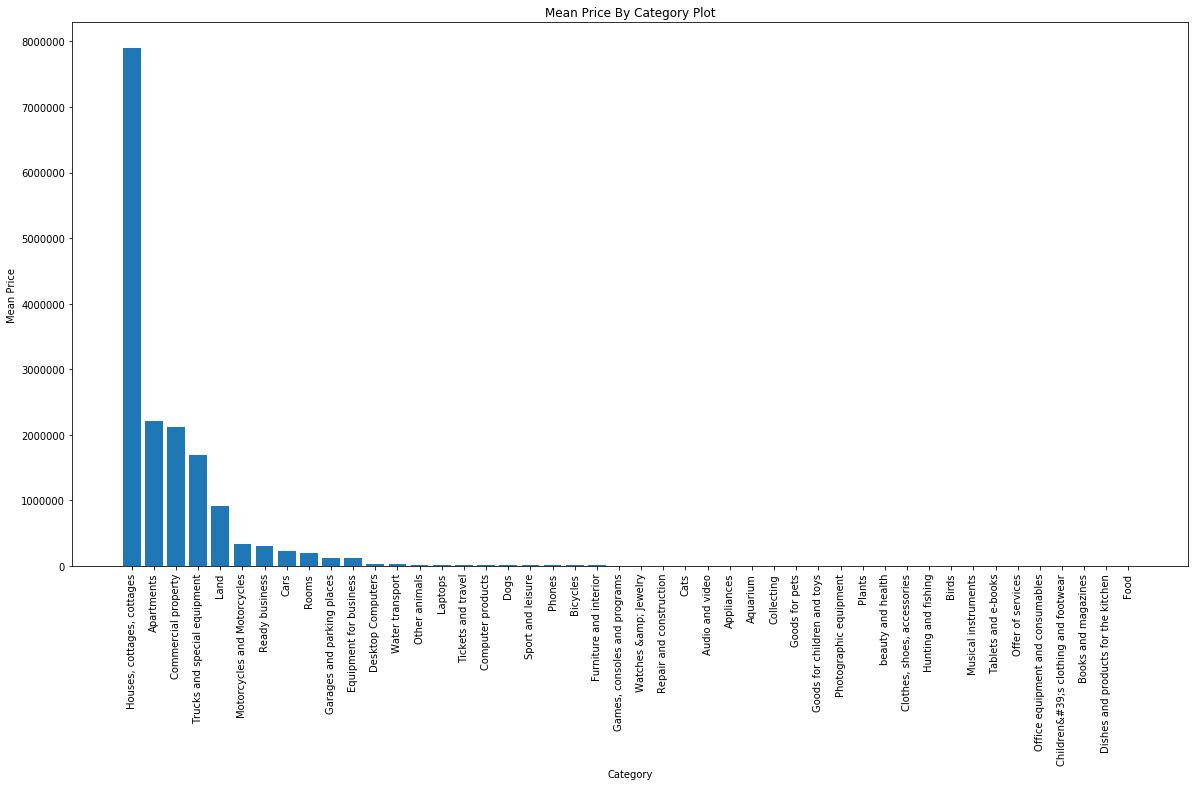

In [140]:
mean_price = train.groupby('category_name_en')['price'].mean().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(mean_price.index, mean_price.values)
plt.title('Mean Price By Category Plot')
plt.xlabel('Category')
plt.ylabel('Mean Price')
plt.show()

In [141]:
print(mean_price.head(5))

category_name_en
Houses, cottages, cottages      7.897333e+06
Apartments                      2.213583e+06
Commercial property             2.113250e+06
Trucks and special equipment    1.695000e+06
Land                            9.100000e+05
Name: price, dtype: float64


We can see that most items are from the 'Children's clothing and footwear' category and the 'clothes,shoes,accessories'.
<br>We can  also see that the 'Offer of services' category has really high deal_probability (0.4) and the 'cars' cetegory and some animal categories also has relatively high deal_probability. </br>
<br>We can  also see that there are several categories with really low deal probability (<=0.05). </br>
<br>Finally we saw that the price per category is really diverse. </br>

### Parent Categories

Let's make similar exploration for the parent categories:

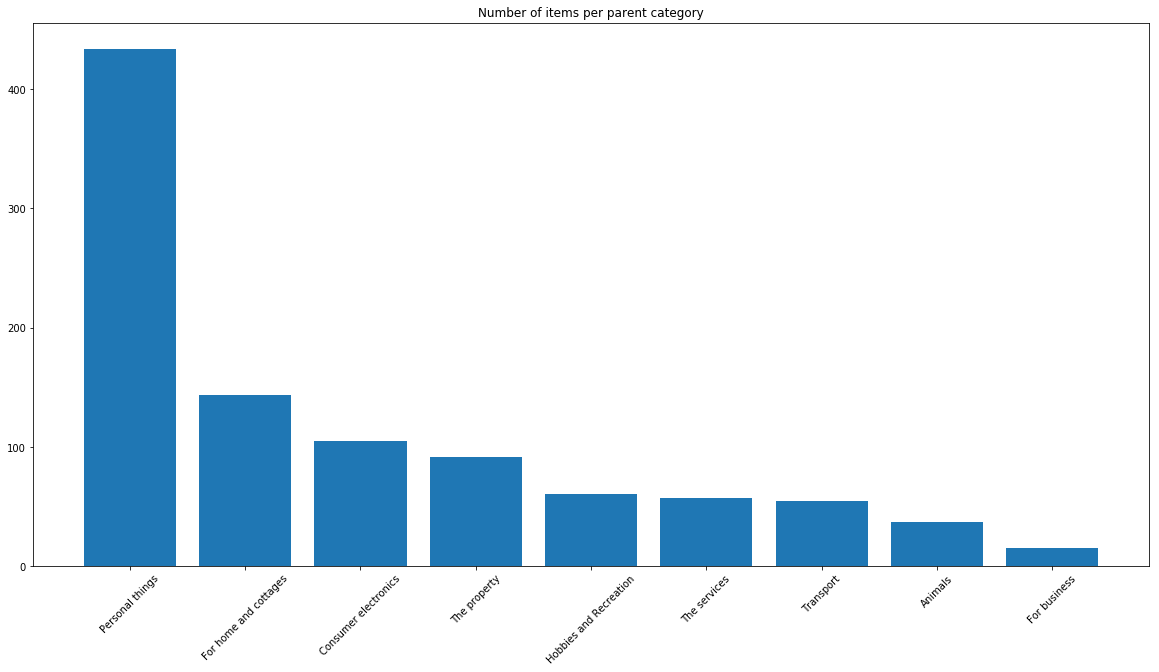

In [142]:
parent_category_counts = train.groupby('parent_category_name_en')['item_id'].count().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(parent_category_counts.index, parent_category_counts.values)
plt.title('Number of items per parent category')
plt.show()

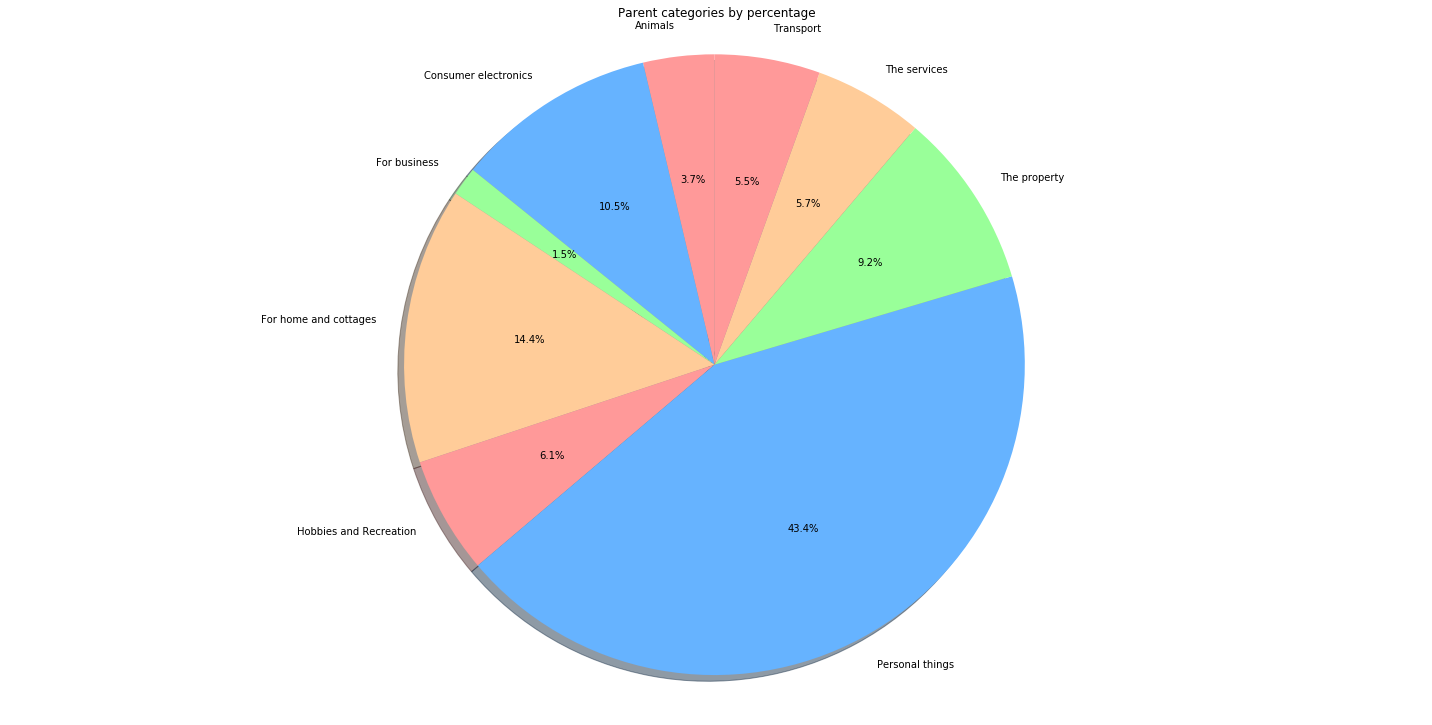

In [143]:
parent_category_dist = train.groupby('parent_category_name_en').size()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = parent_category_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(parent_category_dist, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('Parent categories by percentage')
plt.show()

#### Top 3  parent categories by count:

In [144]:
print(parent_category_counts.head(3))

parent_category_name_en
Personal things          434
For home and cottages    144
Consumer electronics     105
Name: item_id, dtype: int64


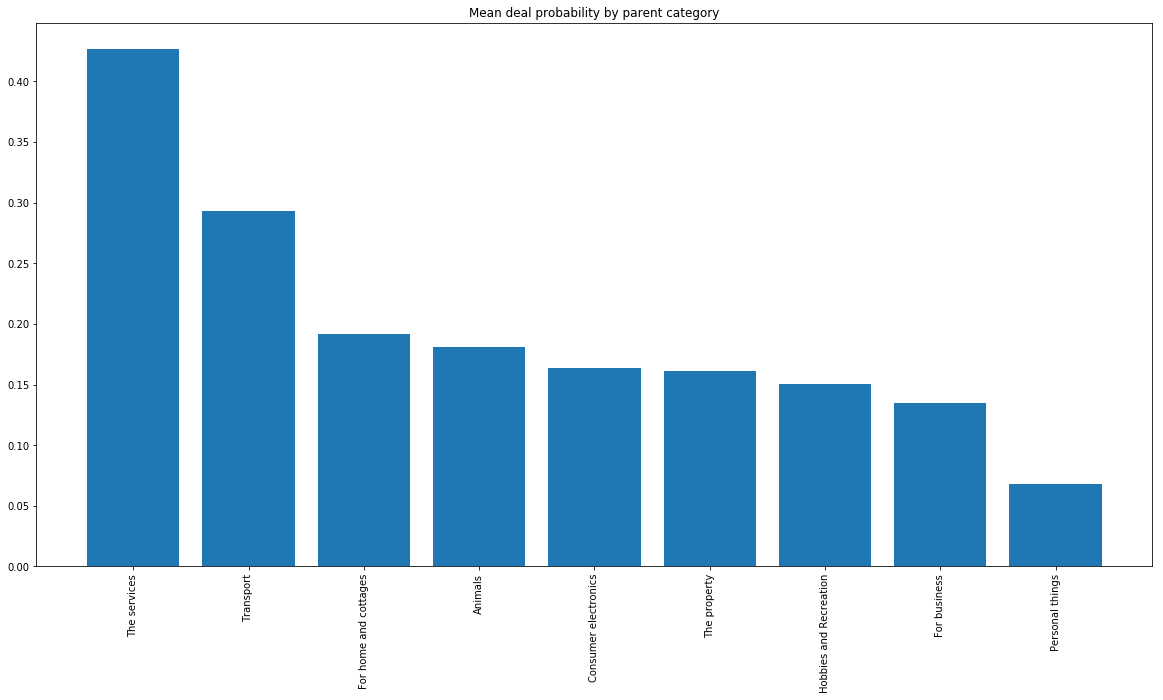

In [145]:
mean_deal_prob = train.groupby('parent_category_name_en')['deal_probability'].mean().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(mean_deal_prob.index, mean_deal_prob.values)
plt.title('Mean deal probability by parent category')
plt.show()

#### Top 3 parent categories by mean_deal_probability:

In [146]:
print(mean_deal_prob.head(3))

parent_category_name_en
The services             0.426984
Transport                0.293256
For home and cottages    0.191880
Name: deal_probability, dtype: float64


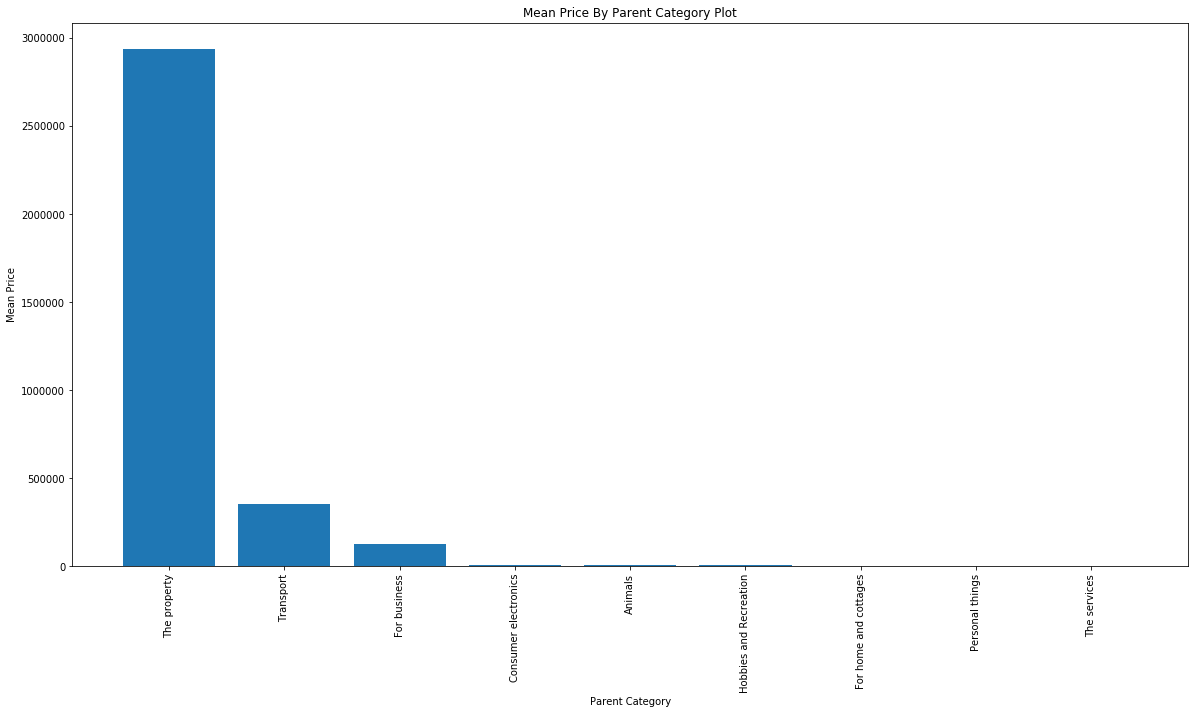

In [147]:
mean_price = train.groupby('parent_category_name_en')['price'].mean().sort_values(ascending=False)
plt.xticks(rotation=90)
plt.bar(mean_price.index, mean_price.values)
plt.title('Mean Price By Parent Category Plot')
plt.xlabel('Parent Category')
plt.ylabel('Mean Price')
plt.show()

We can see that large majority (almost 50%) of items are from the 'Personal things' parent category and their deal probability is really low (~0.07).
<br>We can also see that 'The services', 'Transport' and 'Animals' parent categories have the highest deal_probability (but there aren't many items from those categories)</br>
<br>Finally we saw that the propery category has really high price and the variance between prices per parent category is really high.</br>

### Image top 1

Image top 1 is a really interesting feature - it is unclear how it was determined by Avito.
<br>We need to decide weather to use it as a numerical feature or a categorical feature.</br>
<br>In order to do that we would like to check how many unique values are and what is the correlation between this image and the target variable</br>

In [148]:
print('Number of image_top_1 values:', train['image_top_1'].nunique())

Number of image_top_1 values: 567


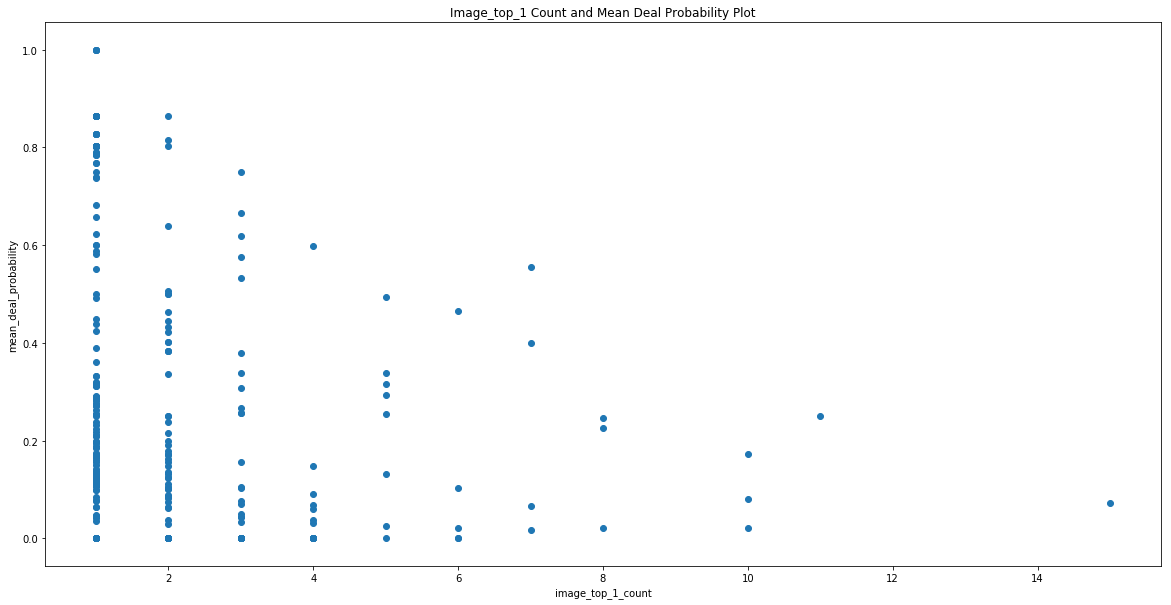

In [149]:
check = train[['image_top_1','deal_probability']]
image_top_1_mean = check.groupby('image_top_1').mean()
image_top_1_mean = image_top_1_mean.rename(columns = {'deal_probability' : 'mean_deal_probability'})
image_top_1_count = check.groupby('image_top_1').count()
image_top_1_count = image_top_1_count.rename(columns = {'deal_probability' : 'image_top_1_count'})
new_df = image_top_1_mean.join(image_top_1_count)
plt.scatter(new_df['image_top_1_count'], new_df['mean_deal_probability'])
plt.title("Image_top_1 Count and Mean Deal Probability Plot")
plt.xlabel("image_top_1_count")
plt.ylabel("mean_deal_probability")
plt.show()

#### Correlation between image_top_1 value and deal_probability:

In [150]:
print(check.corr())
print(check.corr('spearman'))
print(check.corr('kendall'))

                  image_top_1  deal_probability
image_top_1          1.000000          0.195835
deal_probability     0.195835          1.000000
                  image_top_1  deal_probability
image_top_1          1.000000          0.267869
deal_probability     0.267869          1.000000
                  image_top_1  deal_probability
image_top_1          1.000000          0.200259
deal_probability     0.200259          1.000000


#### Correlation between image_top_1 count and mean_deal_probability:

In [151]:
print(new_df.corr())
print(new_df.corr('spearman'))
print(new_df.corr('kendall'))

                       mean_deal_probability  image_top_1_count
mean_deal_probability               1.000000           0.020545
image_top_1_count                   0.020545           1.000000
                       mean_deal_probability  image_top_1_count
mean_deal_probability               1.000000           0.183054
image_top_1_count                   0.183054           1.000000
                       mean_deal_probability  image_top_1_count
mean_deal_probability               1.000000           0.156929
image_top_1_count                   0.156929           1.000000


It is unclear weather this feature should be treated as a numerical feature or categorical feature.
<br>On the one hand, it has a quite small set of unique values (about 3000).</br>
<br>On the other hand it has quite high linear and monotonic correlation with the target variable (pearson,spearman).</br>
<br>We will need to test our models to decide what is the better approach.</br>

Let's try to explore some interesting images (with at least 0.4 deal probability and at least 10 items):

In [152]:
power_images = new_df[(new_df.mean_deal_probability >= 0.4) & (new_df.image_top_1_count  > 10) ]
print(power_images.sort_values(by = 'mean_deal_probability' , ascending = False).head(10))

Empty DataFrame
Columns: [mean_deal_probability, image_top_1_count]
Index: []


Let's add a boolean feature for power images:

In [153]:
index_1 = list(power_images.index)
train['is_power_image'] = np.isin(train['image_top_1'], index_1)
print(train[train['is_power_image'] == True].shape[0]/ train.shape[0]*100)

0.0


### Dates

In [154]:
print('Number of activation_date values:', train['activation_date'].nunique())

Number of activation_date values: 14


We can see that the activation dates are in a small interval of about 20 days.
<br>Let's extract the weekday,month and day from the date feature and explore them:</br>

In [155]:
train['weekday'] = train.activation_date.dt.weekday
train['month'] = train.activation_date.dt.month
train['day'] = train.activation_date.dt.day

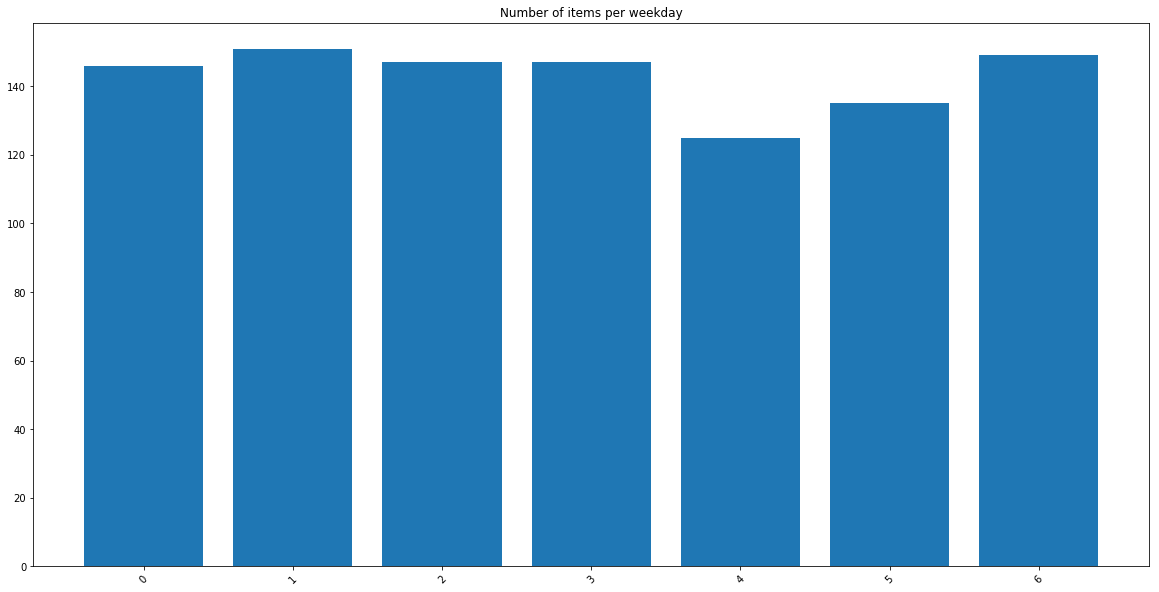

In [156]:
weekday_counts = train.groupby('weekday')['item_id'].count().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(weekday_counts.index, weekday_counts.values)
plt.title('Number of items per weekday')
plt.show()
# 0 is Monday, 6 is Sunday

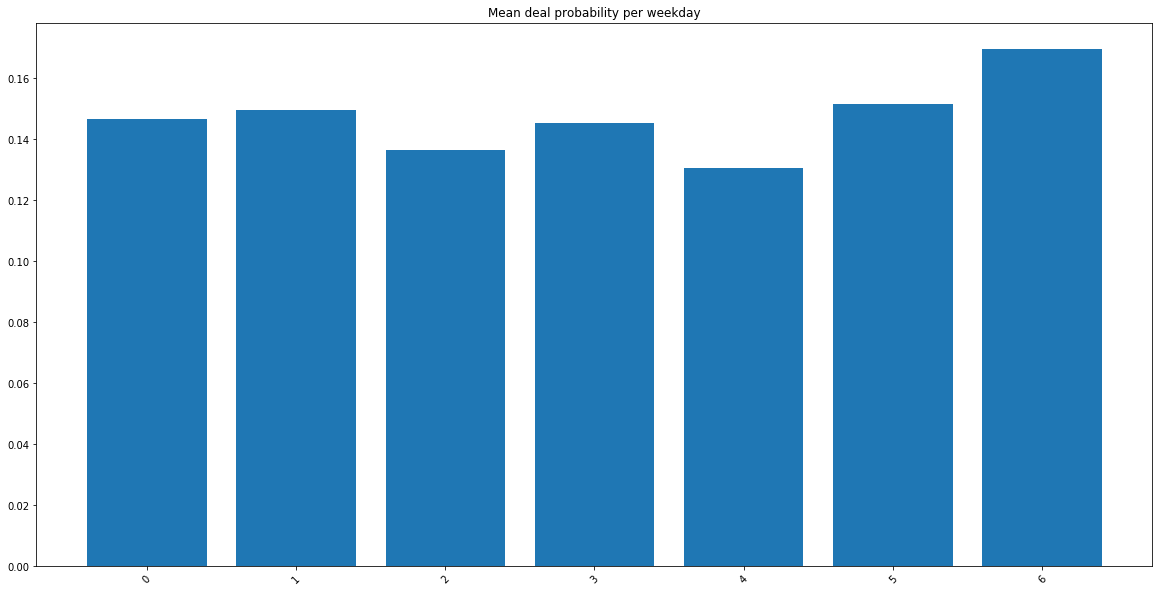

In [157]:
weekday_deal_prob = train.groupby('weekday')['deal_probability'].mean().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(weekday_deal_prob.index, weekday_deal_prob.values)
plt.title('Mean deal probability per weekday')
plt.show()

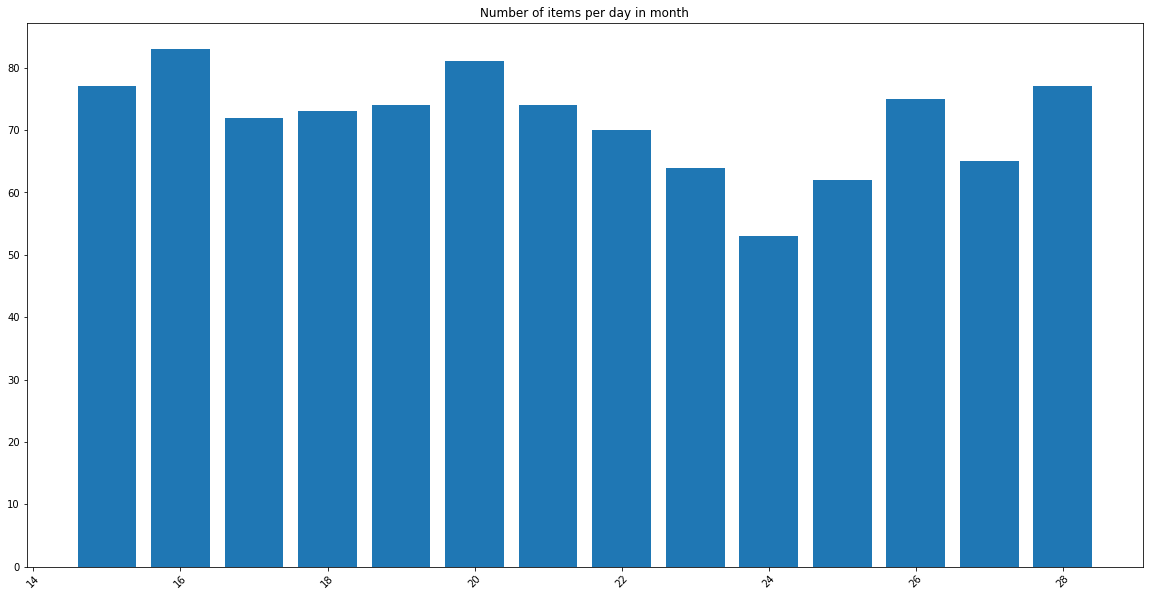

In [158]:
day_counts = train.groupby('day')['item_id'].count().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(day_counts.index, day_counts.values)
plt.title('Number of items per day in month')
plt.show()

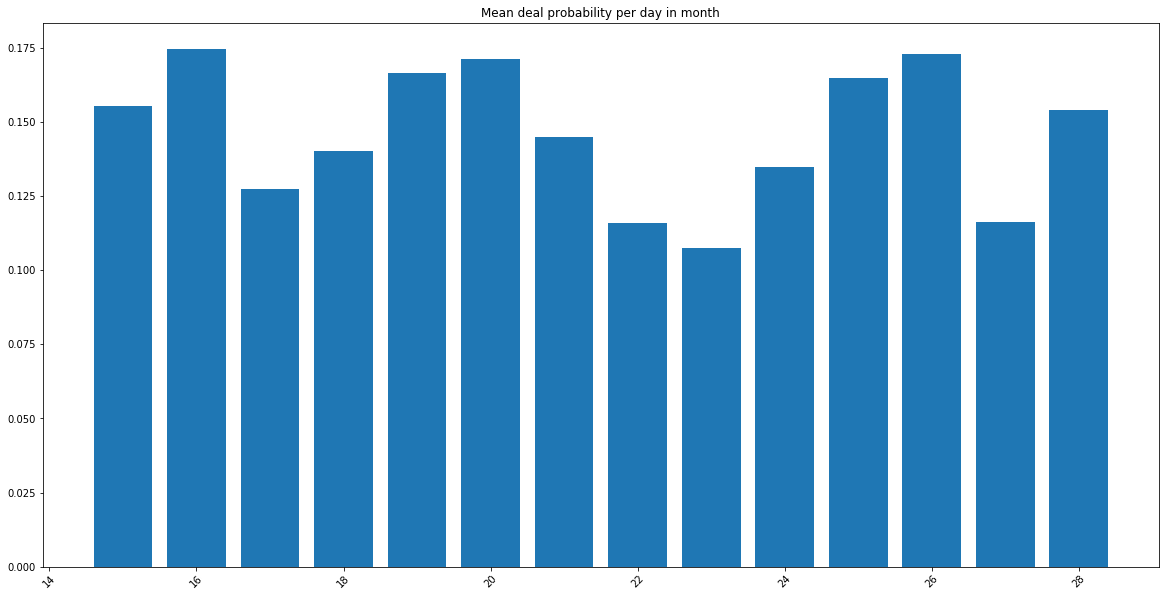

In [159]:
day_deal_prob = train.groupby('day')['deal_probability'].mean().sort_values(ascending=False)
plt.xticks(rotation=45)
plt.bar(day_deal_prob.index, day_deal_prob.values)
plt.title('Mean deal probability per day in month')
plt.show()

We can see that there isn't much to deduce from the date feature regarding the target variable

### Item Seq Number

The item seq number feature is similar to the image top 1 feature in the way that it is unclear weather it should be categorical or numerical.
<br>Therefore we will make a similar analysis to the one we made for the image_top_1 feature
<br> Let's see how many unique values it has:</br>

In [160]:
print('Number of item_seq_number values:', train['item_seq_number'].nunique())

Number of item_seq_number values: 287


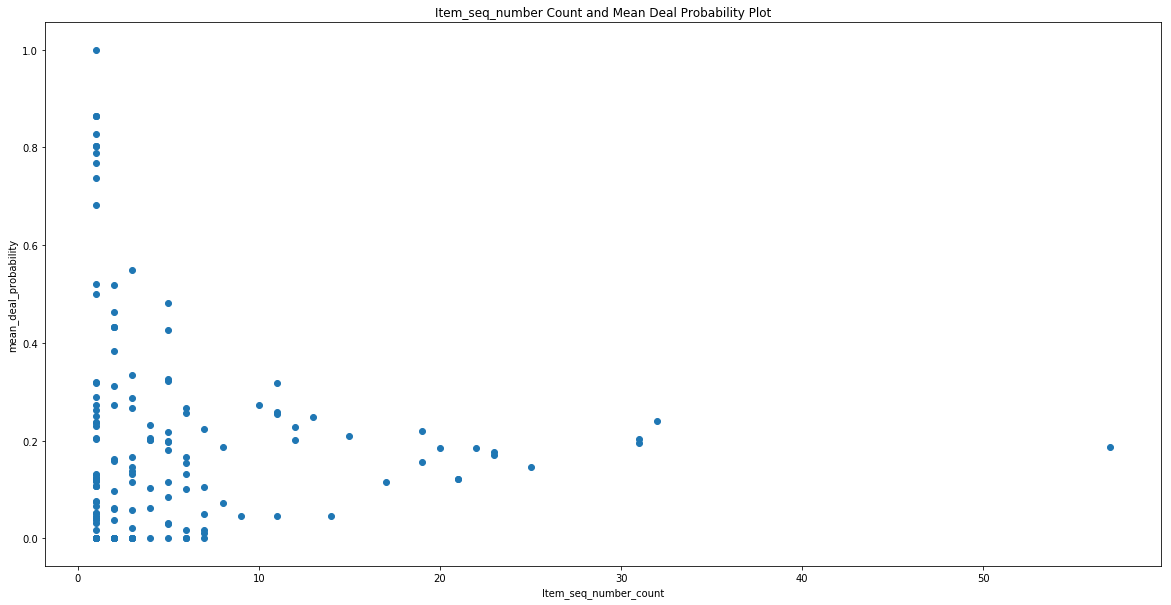

In [161]:
check = train[['item_seq_number','deal_probability']]
item_seq_number_mean = check.groupby('item_seq_number').mean()
item_seq_number_mean = item_seq_number_mean.rename(columns = {'deal_probability' : 'mean_deal_probability'})
item_seq_number_count = check.groupby('item_seq_number').count()
item_seq_number_count = item_seq_number_count.rename(columns = {'deal_probability' : 'item_seq_number_count'})
new_df = item_seq_number_mean.join(item_seq_number_count)
plt.scatter(new_df['item_seq_number_count'], new_df['mean_deal_probability'])
plt.title("Item_seq_number Count and Mean Deal Probability Plot")
plt.xlabel("Item_seq_number_count")
plt.ylabel("mean_deal_probability")
plt.show()

We can see a steady increase between the number of items with the same item_seq_number and the deal probability.

#### Correlation between item_seq_number value and deal_probability:

In [162]:
print(check.corr())
print(check.corr('spearman'))
print(check.corr('kendall'))

                  item_seq_number  deal_probability
item_seq_number          1.000000         -0.053134
deal_probability        -0.053134          1.000000
                  item_seq_number  deal_probability
item_seq_number          1.000000         -0.220651
deal_probability        -0.220651          1.000000
                  item_seq_number  deal_probability
item_seq_number           1.00000          -0.16152
deal_probability         -0.16152           1.00000


#### Correlation between item_seq_number count and deal_probability:

In [163]:
print(new_df.corr())
print(new_df.corr('spearman'))
print(new_df.corr('kendall'))

                       mean_deal_probability  item_seq_number_count
mean_deal_probability               1.000000               0.117294
item_seq_number_count               0.117294               1.000000
                       mean_deal_probability  item_seq_number_count
mean_deal_probability               1.000000               0.423724
item_seq_number_count               0.423724               1.000000
                       mean_deal_probability  item_seq_number_count
mean_deal_probability               1.000000               0.345274
item_seq_number_count               0.345274               1.000000


We can see some negative monotonic relation between the item_seq_number value and the target variable. 
<br>In the case of this feature it is quite clear it should be treated as a numerical feature because of the quite large set of unique values it has(~30,000) and the correlation with the target variable.</br>
<br>We can see a quite strong monotonic correlation between the item_seq_number_count and the target variable (like we saw in the graph).</br>
<br>Therefore it might be interesting to use it as a feature.Let's do it:</br>

In [164]:
train = train.join(item_seq_number_count, on='item_seq_number')

### Price

Let's make some basic exploration of the price feature:

In [165]:
train.price.describe()

count    9.350000e+02
mean     2.886516e+05
std      2.548879e+06
min      0.000000e+00
25%      5.000000e+02
50%      1.200000e+03
75%      6.350000e+03
max      7.200000e+07
Name: price, dtype: float64

In [166]:
check = train[['price','deal_probability']]
print(check.corr())
print(check.corr('spearman'))
print(check.corr('kendall'))

                     price  deal_probability
price             1.000000          0.005827
deal_probability  0.005827          1.000000
                     price  deal_probability
price             1.000000          0.192427
deal_probability  0.192427          1.000000
                     price  deal_probability
price             1.000000          0.142728
deal_probability  0.142728          1.000000


/Users/ilaif/.virtualenvs/ds/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



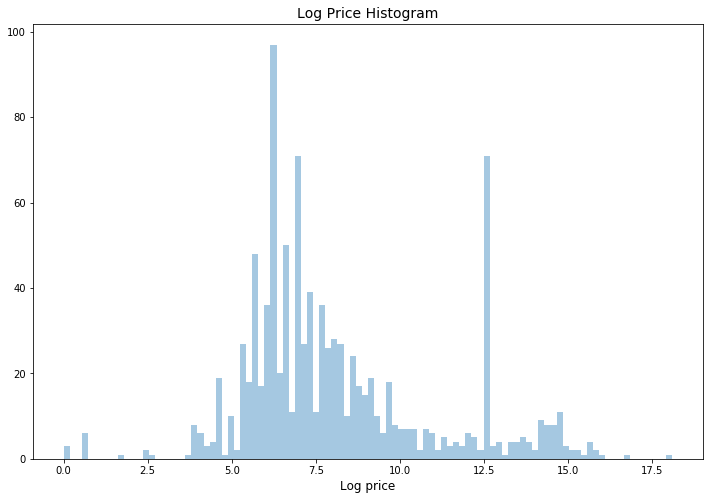

In [167]:
train['log_price'] = train['price']
train['log_price'].fillna(np.nanmean(train['price']), inplace=True)
plt.figure(figsize=(12,8))
sns.distplot(np.log1p(train['log_price'].values), bins=100, kde=False)
plt.xlabel('Log price', fontsize=12)
plt.title('Log Price Histogram', fontsize=14)
plt.show()

We can conclude that as expected the price is quite correlated (in a monotonic way) to the target variable.
<br>We can also observe that it has really high variance.</br>
<br>Because of the high variance and really high values we created the 'log_price' feature</br>

### Params

In [168]:
print('Number of param_1:', train['param_1'].nunique())
print('Number of param_2:', train['param_2'].nunique())
print('Number of param_3:', train['param_3'].nunique())

Number of param_1: 146
Number of param_2: 94
Number of param_3: 90


We can see the number of unique values for each param is quite small

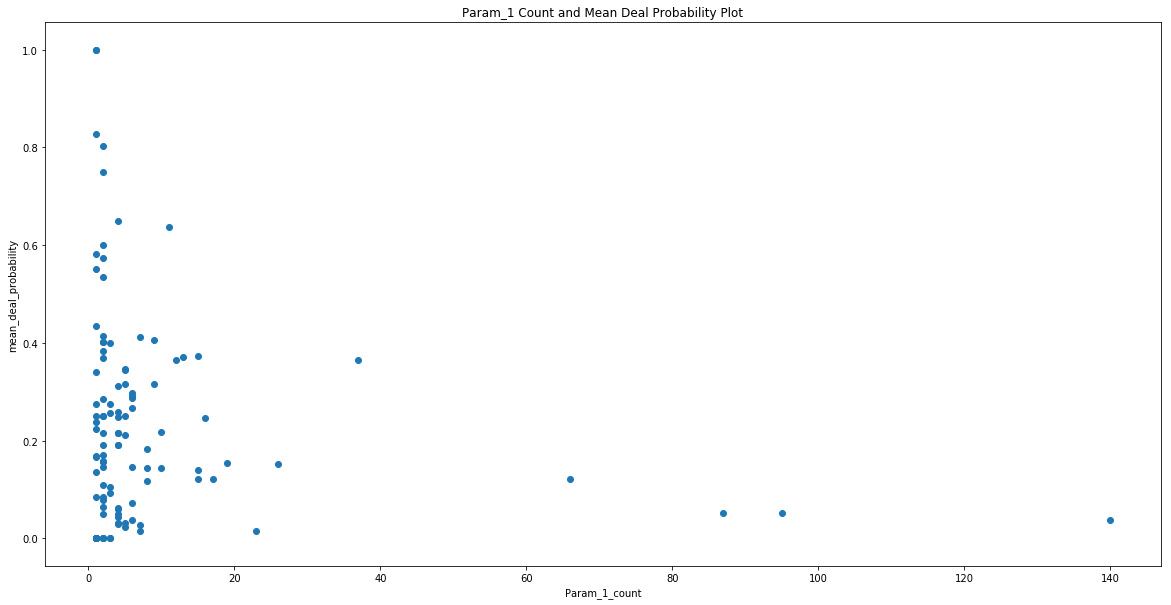

In [169]:
check = train[['param_1','deal_probability']]
param_1_mean = check.groupby('param_1').mean()
param_1_mean = param_1_mean.rename(columns = {'deal_probability' : 'mean_deal_probability'})
param_1_count = check.groupby('param_1').count()
param_1_count = param_1_count.rename(columns = {'deal_probability' : 'param_1_count'})
new_df = param_1_mean.join(param_1_count)
plt.scatter(new_df['param_1_count'], new_df['mean_deal_probability'])
plt.title("Param_1 Count and Mean Deal Probability Plot")
plt.xlabel("Param_1_count")
plt.ylabel("mean_deal_probability")
plt.show()

In [170]:
print(new_df.corr())
print(new_df.corr('spearman'))
print(new_df.corr('kendall'))

                       mean_deal_probability  param_1_count
mean_deal_probability               1.000000      -0.048457
param_1_count                      -0.048457       1.000000
                       mean_deal_probability  param_1_count
mean_deal_probability               1.000000       0.433469
param_1_count                       0.433469       1.000000
                       mean_deal_probability  param_1_count
mean_deal_probability               1.000000       0.312289
param_1_count                       0.312289       1.000000


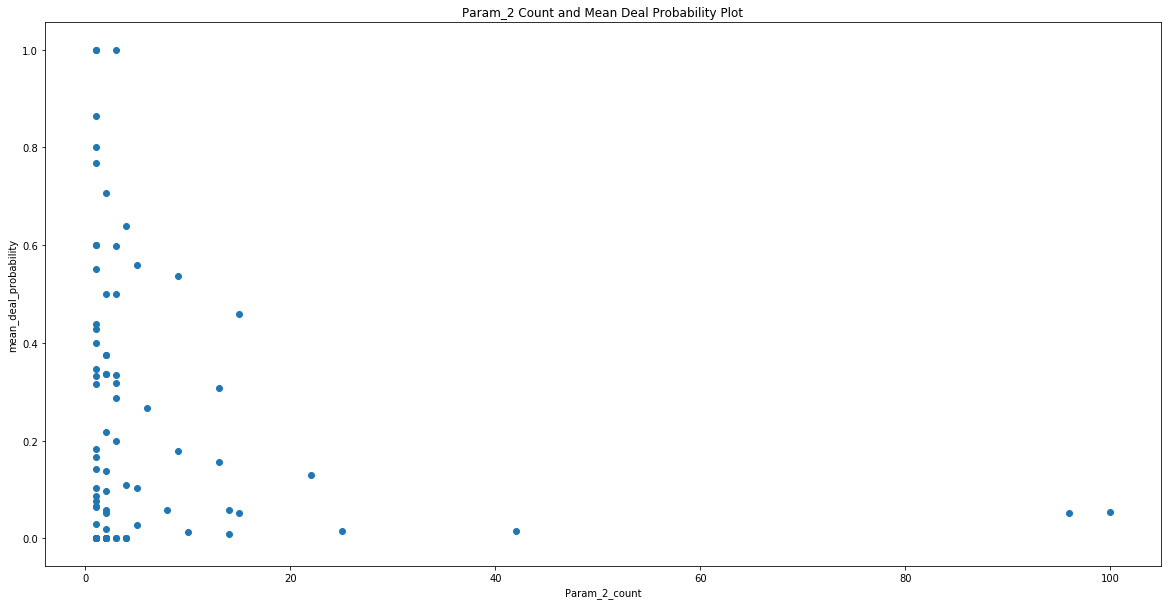

In [171]:
check = train[['param_2','deal_probability']]
param_2_mean = check.groupby('param_2').mean()
param_2_mean = param_2_mean.rename(columns = {'deal_probability' : 'mean_deal_probability'})
param_2_count = check.groupby('param_2').count()
param_2_count = param_2_count.rename(columns = {'deal_probability' : 'param_2_count'})
new_df = param_2_mean.join(param_2_count)
plt.scatter(new_df['param_2_count'], new_df['mean_deal_probability'])
plt.title("Param_2 Count and Mean Deal Probability Plot")
plt.xlabel("Param_2_count")
plt.ylabel("mean_deal_probability")
plt.show()

In [172]:
print(new_df.corr())
print(new_df.corr('spearman'))
print(new_df.corr('kendall'))

                       mean_deal_probability  param_2_count
mean_deal_probability               1.000000      -0.123244
param_2_count                      -0.123244       1.000000
                       mean_deal_probability  param_2_count
mean_deal_probability               1.000000       0.080112
param_2_count                       0.080112       1.000000
                       mean_deal_probability  param_2_count
mean_deal_probability                1.00000        0.05084
param_2_count                        0.05084        1.00000


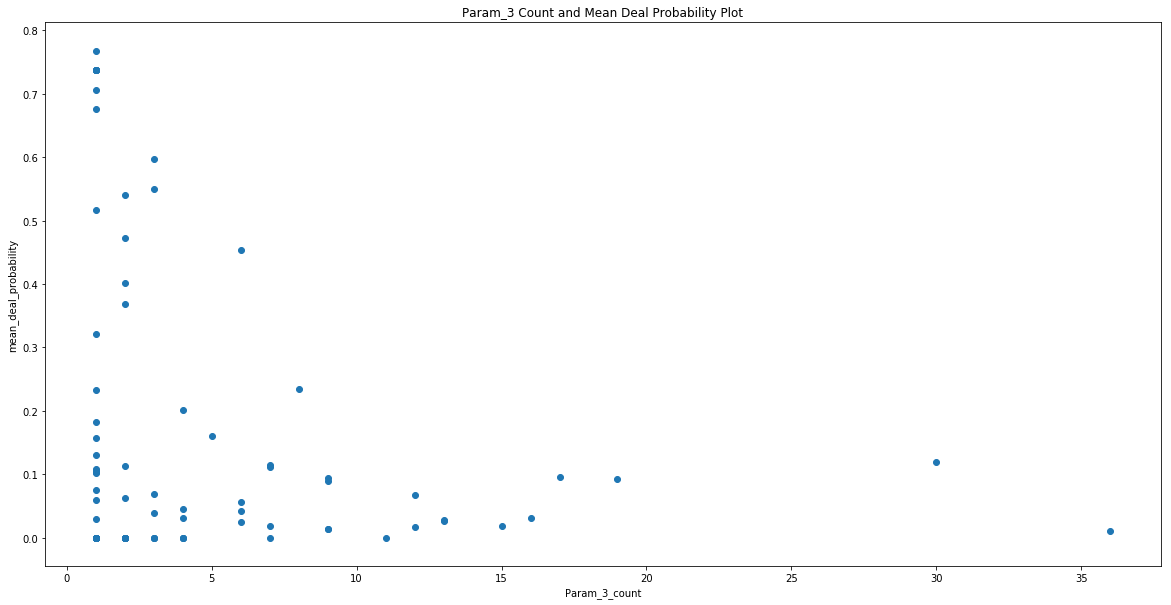

In [173]:
check = train[['param_3','deal_probability']]
param_3_mean = check.groupby('param_3').mean()
param_3_mean = param_3_mean.rename(columns = {'deal_probability' : 'mean_deal_probability'})
param_3_count = check.groupby('param_3').count()
param_3_count = param_3_count.rename(columns = {'deal_probability' : 'param_3_count'})
new_df = param_3_mean.join(param_3_count)
plt.scatter(new_df['param_3_count'], new_df['mean_deal_probability'])
plt.title("Param_3 Count and Mean Deal Probability Plot")
plt.xlabel("Param_3_count")
plt.ylabel("mean_deal_probability")
plt.show()

### Missing Values

In [181]:
np.sum(train.isnull())/train.shape[0]*100

Unnamed: 0                  0.0
item_id                     0.0
user_id                     0.0
region                      0.0
city                        0.0
parent_category_name        0.0
category_name               0.0
param_1                     4.4
param_2                    44.7
param_3                    59.4
title                       0.0
description                 6.7
price                       6.5
item_seq_number             0.0
activation_date             0.0
user_type                   0.0
image                       7.9
image_top_1                 7.9
deal_probability            0.0
parent_category_name_en     0.0
category_name_en            0.0
param_1_en                  4.4
param_2_en                 44.7
param_3_en                 59.4
is_power_user               0.0
is_weak_user                0.0
is_power_image              0.0
weekday                     0.0
month                       0.0
day                         0.0
item_seq_number_count       0.0
log_pric

We need to handle this missing values.
<br>Large portion of them are in the param_2 and param_3 columns.</br>
<br>It might be interesting to study the items that has NAN values. Let's create boolean features for them:</br>

In [182]:
train['has_description'] = train['description'].notna()
train['has_price'] = train['price'].notna()
train['has_params'] = train['param_1'].notna()
train['has_image'] = train['image'].notna()

## Feature Correlation

Pearson correlation:

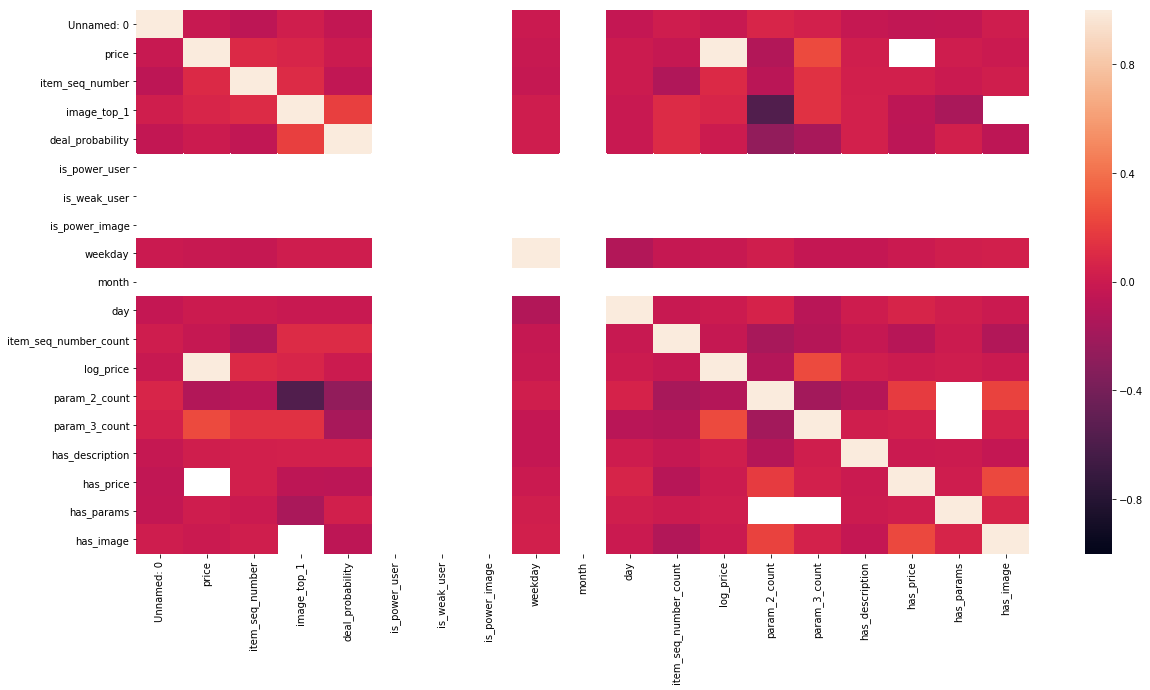

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,-0.020783,-0.064935,0.029947,-0.040685,NaN,NaN,NaN,-0.002132,NaN,-0.035708,0.018807,-2.002992e-02,0.078031,0.039352,-0.028604,-4.890688e-02,-0.039878,0.016483
price,-0.020783,1.000000,0.098119,0.072209,0.005827,NaN,NaN,NaN,-0.023203,NaN,0.004158,-0.026930,1.000000e+00,-0.121191,0.247646,0.030320,NaN,0.020350,-0.005589
item_seq_number,-0.064935,0.098119,1.000000,0.104732,-0.053134,NaN,NaN,NaN,-0.026185,NaN,0.001457,-0.127951,9.805913e-02,-0.078183,0.134400,0.036074,3.385399e-02,-0.001528,0.031179
image_top_1,0.029947,0.072209,0.104732,1.000000,0.195835,NaN,NaN,NaN,0.019101,NaN,-0.009908,0.102261,7.134874e-02,-0.570979,0.138161,0.044989,-6.587480e-02,-0.157372,NaN
deal_probability,-0.040685,0.005827,-0.053134,0.195835,1.000000,NaN,NaN,NaN,0.019191,NaN,-0.015022,0.106207,5.552044e-03,-0.272539,-0.167028,0.042583,-7.360253e-02,0.038277,-0.064444
is_power_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,-0.002132,-0.023203,-0.026185,0.019101,0.019191,NaN,NaN,NaN,1.000000,NaN,-0.119957,-0.024987,-2.231318e-02,0.030602,-0.034458,-0.033737,-1.860102e-03,0.026637,0.032062
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
corr = train.corr()
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

Spearman correlation:

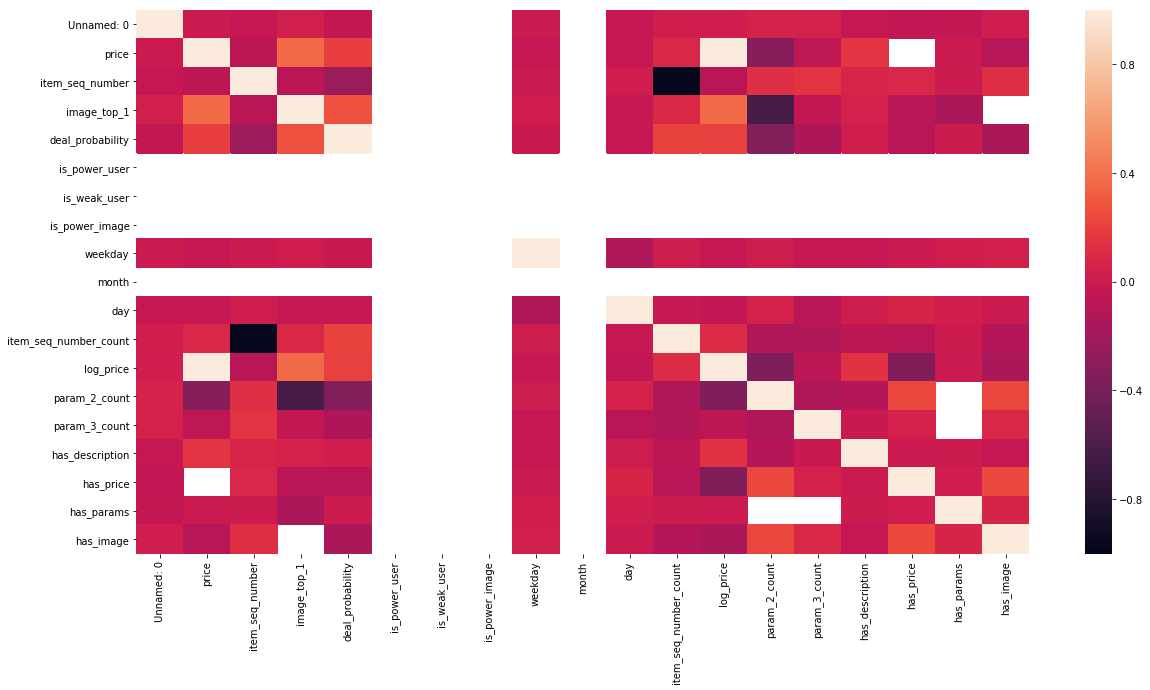

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,-0.001556,-0.036387,0.032158,-0.042903,NaN,NaN,NaN,-0.001224,NaN,-0.035900,0.030680,0.015837,0.060069,0.051398,-0.028604,-0.048907,-0.039878,0.016483
price,-0.001556,1.000000,-0.065813,0.372210,0.192427,NaN,NaN,NaN,-0.028149,NaN,-0.032220,0.086300,1.000000,-0.314284,-0.062120,0.150187,NaN,-0.000529,-0.095623
item_seq_number,-0.036387,-0.065813,1.000000,-0.083684,-0.220651,NaN,NaN,NaN,-0.005771,NaN,0.022105,-0.971520,-0.085974,0.128499,0.141830,0.074778,0.085374,0.003260,0.117622
image_top_1,0.032158,0.372210,-0.083684,1.000000,0.267869,NaN,NaN,NaN,0.022901,NaN,-0.022391,0.086401,0.373077,-0.618959,-0.043410,0.051136,-0.084890,-0.156355,NaN
deal_probability,-0.042903,0.192427,-0.220651,0.267869,1.000000,NaN,NaN,NaN,-0.012188,NaN,-0.025916,0.211392,0.203976,-0.342527,-0.144349,0.029156,-0.083875,0.000176,-0.163378
is_power_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,-0.001224,-0.028149,-0.005771,0.022901,-0.012188,NaN,NaN,NaN,1.000000,NaN,-0.136173,0.013428,-0.029507,0.008142,-0.025008,-0.033972,-0.000909,0.025899,0.033189
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
corr = train.corr('spearman')
sns.heatmap(corr, vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

Kendall-tau correlation:

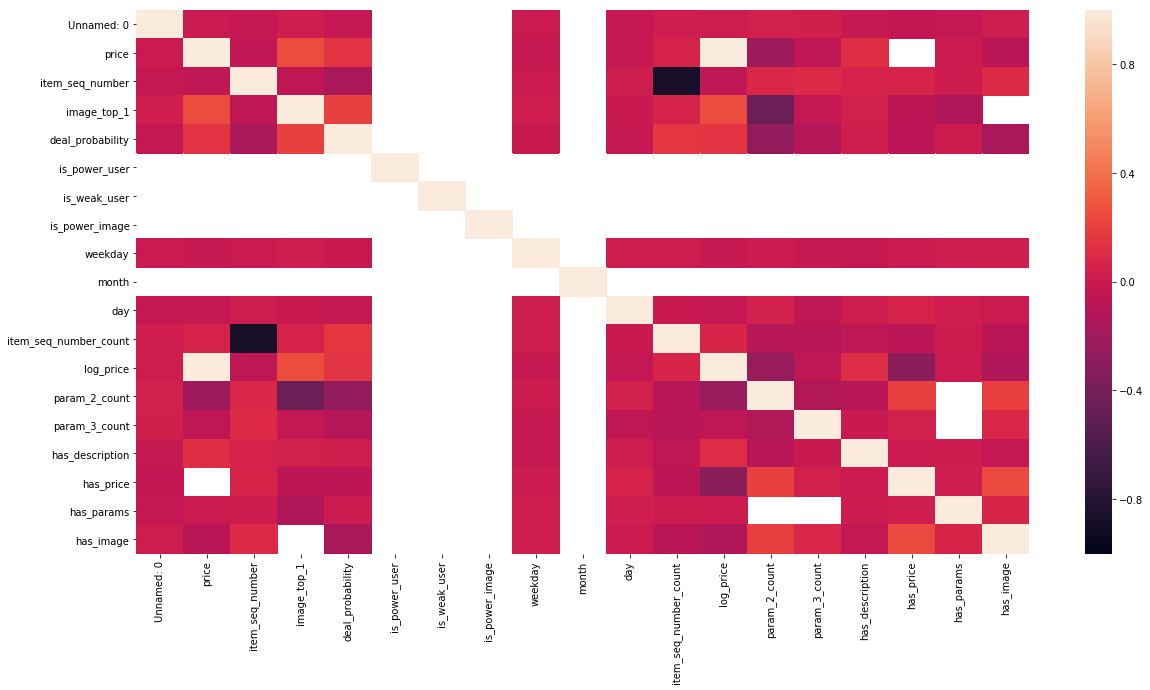

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,-0.001002,-0.023911,0.021415,-0.032092,NaN,NaN,NaN,-0.000045,NaN,-0.024539,0.020593,0.010623,0.041907,0.034182,-0.023367,-0.039952,-0.032576,0.013465
price,-0.001002,1.000000,-0.047423,0.256133,0.142728,NaN,NaN,NaN,-0.020723,NaN,-0.022449,0.062054,1.000000,-0.211974,-0.058119,0.124153,NaN,-0.000437,-0.079047
item_seq_number,-0.023911,-0.047423,1.000000,-0.056792,-0.161520,NaN,NaN,NaN,-0.004043,NaN,0.015463,-0.876609,-0.061054,0.091365,0.098418,0.061472,0.070183,0.002680,0.096693
image_top_1,0.021415,0.256133,-0.056792,1.000000,0.200259,NaN,NaN,NaN,0.016375,NaN,-0.015210,0.060938,0.257141,-0.447731,-0.032149,0.041819,-0.069423,-0.127866,NaN
deal_probability,-0.032092,0.142728,-0.161520,0.200259,1.000000,NaN,NaN,NaN,-0.010105,NaN,-0.020270,0.159583,0.151190,-0.272800,-0.110777,0.026619,-0.076575,0.000161,-0.149160
is_power_user,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,-0.000045,-0.020723,-0.004043,0.016375,-0.010105,NaN,NaN,NaN,1.000000,NaN,0.014527,0.009926,-0.021443,0.007058,-0.019197,-0.029659,-0.000793,0.022611,0.028975
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
corr = train.corr('kendall')
sns.heatmap(corr, vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

We can observe that the price,image_top_1,item_seq_number and param_count are the most correlated features with the target variable.
<br>We can also see that log_price has better correlation than price so it might be better to use it</br>
<br>Finally we can see an almost perfect negative correlation between item_seq_number and item_seq_number_count so it might be redundant to use both for predictions.</br>

Mutual Information:

In [186]:
partial_train = train[:50000]

In [187]:
price_mutual_info = metrics.adjusted_mutual_info_score(partial_train['price'], partial_train['deal_probability'])
print('price MI:',price_mutual_info)

price MI: 0.04842947459713303


In [188]:
item_seq_number_mutual_info = metrics.adjusted_mutual_info_score(partial_train['item_seq_number'], partial_train['deal_probability'])
print('item_seq_number MI:',item_seq_number_mutual_info)

item_seq_number MI: -0.04009740800017995


In [189]:
image_top_1_mutual_info = metrics.adjusted_mutual_info_score(partial_train['image_top_1'], partial_train['deal_probability'])
print('image_top_1 MI:',image_top_1_mutual_info)

image_top_1 MI: 0.01267993534536723


In [190]:
is_power_user_mutual_info = metrics.adjusted_mutual_info_score(partial_train['is_power_user'], partial_train['deal_probability'])
print('is_power_user MI:',is_power_user_mutual_info)

is_power_user MI: -1.8396836831793176e-17


In [191]:
is_weak_user_mutual_info = metrics.adjusted_mutual_info_score(partial_train['is_weak_user'], partial_train['deal_probability'])
print('is_weak_user MI:',is_weak_user_mutual_info)

is_weak_user MI: -1.8396836831793176e-17


We didn't learn much from the MI..

### Deal Classes

Let's seperate the data by the deal probabilities:

In [192]:
deal_class_1 = train[(0 <= train['deal_probability']) &  (train['deal_probability'] < 0.2)]
deal_class_2 = train[(0.2 <= train['deal_probability']) &  (train['deal_probability'] < 0.4)]
deal_class_3 = train[(0.4 <= train['deal_probability']) &  (train['deal_probability'] < 0.6)]
deal_class_4 = train[(0.6 <= train['deal_probability']) &  (train['deal_probability'] < 0.8)]
deal_class_5 = train[(0.8 <= train['deal_probability']) &  (train['deal_probability'] <= 1)]

deal_class_1 percentage of values:  76.6 and mean price is:  201286.3232044199
Pearson correlation:


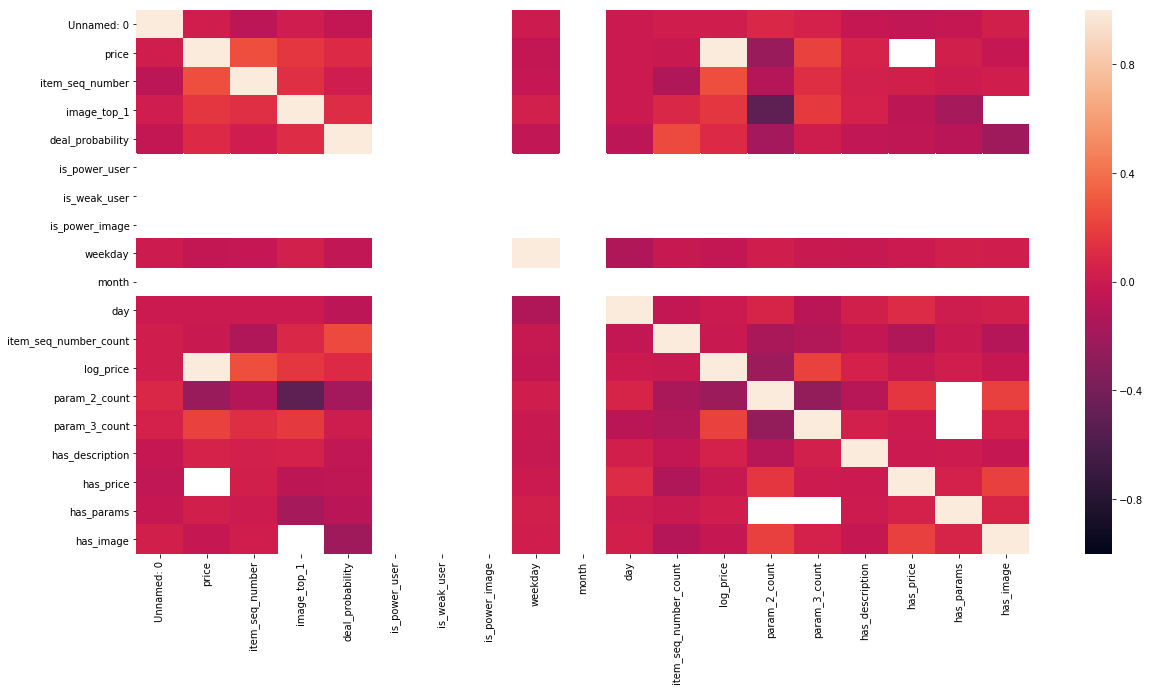

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,0.030129,-0.070983,0.021561,-0.042314,NaN,NaN,NaN,0.001315,NaN,-0.000586,0.026051,0.030259,0.093022,0.052927,-0.026892,-0.050000,-0.028819,0.032053
price,0.030129,1.000000,0.265009,0.163343,0.097467,NaN,NaN,NaN,-0.046008,NaN,-0.003860,-0.013108,1.000000,-0.231972,0.218621,0.055562,NaN,0.032036,-0.029300
item_seq_number,-0.070983,0.265009,1.000000,0.131336,0.016767,NaN,NaN,NaN,-0.032665,NaN,-0.002060,-0.131994,0.264094,-0.103231,0.122592,0.042852,0.034843,0.000056,0.026832
image_top_1,0.021561,0.163343,0.131336,1.000000,0.114620,NaN,NaN,NaN,0.039628,NaN,-0.002484,0.086312,0.162493,-0.511951,0.179315,0.053803,-0.065047,-0.176381,NaN
deal_probability,-0.042314,0.097467,0.016767,0.114620,1.000000,NaN,NaN,NaN,-0.053592,NaN,-0.074305,0.248066,0.094446,-0.185837,0.010315,-0.047766,-0.056862,-0.092387,-0.205409
is_power_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,0.001315,-0.046008,-0.032665,0.039628,-0.053592,NaN,NaN,NaN,1.000000,NaN,-0.130576,-0.020669,-0.044310,0.028430,-0.010704,-0.023356,-0.004350,0.032700,0.024876
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Spearman correlation:


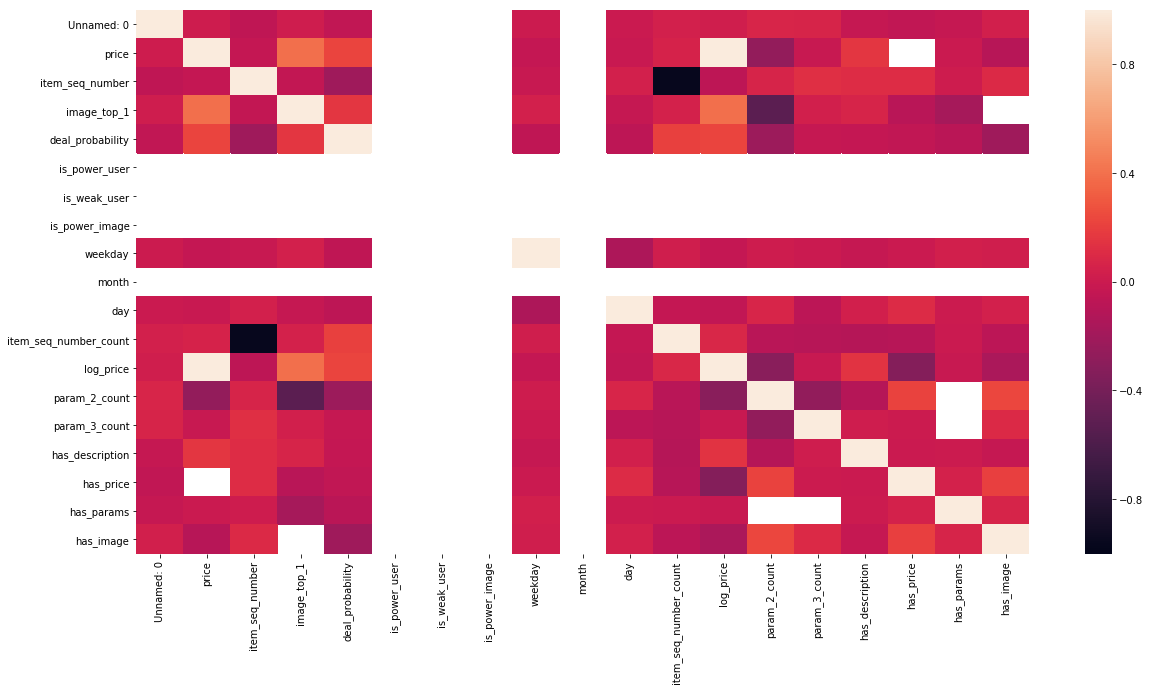

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,0.012276,-0.056090,0.022870,-0.053823,NaN,NaN,NaN,0.002334,NaN,-0.001710,0.045881,0.028571,0.075314,0.068879,-0.027299,-0.050338,-0.028513,0.031870
price,0.012276,1.000000,-0.034146,0.394066,0.221752,NaN,NaN,NaN,-0.037869,NaN,-0.012835,0.058785,1.000000,-0.264740,-0.019970,0.160533,NaN,-0.006992,-0.098928
item_seq_number,-0.056090,-0.034146,1.000000,-0.041809,-0.203489,NaN,NaN,NaN,-0.020270,NaN,0.041930,-0.968452,-0.065172,0.070141,0.126326,0.115894,0.113945,0.013233,0.098307
image_top_1,0.022870,0.394066,-0.041809,1.000000,0.163538,NaN,NaN,NaN,0.043046,NaN,-0.024691,0.050828,0.396641,-0.526545,0.035794,0.064983,-0.087607,-0.177779,NaN
deal_probability,-0.053823,0.221752,-0.203489,0.163538,1.000000,NaN,NaN,NaN,-0.060227,NaN,-0.064050,0.205801,0.221848,-0.221295,-0.025549,-0.034853,-0.047116,-0.079444,-0.203134
is_power_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,0.002334,-0.037869,-0.020270,0.043046,-0.060227,NaN,NaN,NaN,1.000000,NaN,-0.143212,0.027582,-0.038169,0.014872,-0.000973,-0.024095,-0.002961,0.031955,0.025840
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Kendal-tau correlation:


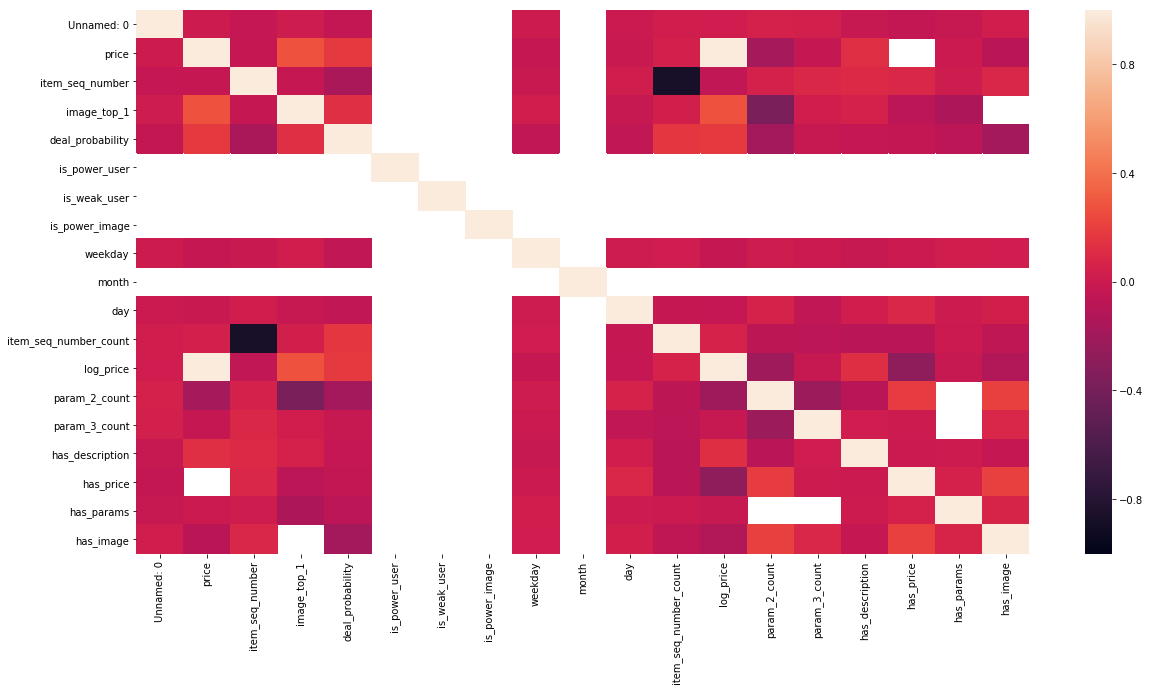

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,0.007513,-0.037195,0.014874,-0.042400,NaN,NaN,NaN,0.002115,NaN,-0.001176,0.030789,0.018599,0.054497,0.045941,-0.022304,-0.041127,-0.023296,0.026039
price,0.007513,1.000000,-0.025785,0.273614,0.174792,NaN,NaN,NaN,-0.027805,NaN,-0.008708,0.042949,1.000000,-0.177531,-0.024808,0.132770,NaN,-0.005783,-0.081819
item_seq_number,-0.037195,-0.025785,1.000000,-0.028819,-0.156525,NaN,NaN,NaN,-0.014473,NaN,0.029188,-0.871848,-0.047238,0.051503,0.087807,0.095198,0.093597,0.010870,0.080752
image_top_1,0.014874,0.273614,-0.028819,1.000000,0.127519,NaN,NaN,NaN,0.030741,NaN,-0.016547,0.036296,0.275460,-0.382521,0.025115,0.053153,-0.071658,-0.145414,NaN
deal_probability,-0.042400,0.174792,-0.156525,0.127519,1.000000,NaN,NaN,NaN,-0.050853,NaN,-0.051393,0.163904,0.174684,-0.181318,-0.020386,-0.033384,-0.045130,-0.076095,-0.194569
is_power_user,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,0.002115,-0.027805,-0.014473,0.030741,-0.050853,NaN,NaN,NaN,1.000000,NaN,0.009343,0.020303,-0.027656,0.012488,-0.000579,-0.021035,-0.002585,0.027897,0.022558
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
print('deal_class_1 percentage of values: ', len(deal_class_1)/train.shape[0]*100, 'and mean price is: ', deal_class_1['price'].mean())
print('Pearson correlation:')
corr = deal_class_1.corr()
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Spearman correlation:')
corr = deal_class_1.corr('spearman')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Kendal-tau correlation:')
corr = deal_class_1.corr('kendall')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

deal_class_2 percentage of values:  8.799999999999999 and mean price is:  1426449.2
Pearson correlation:


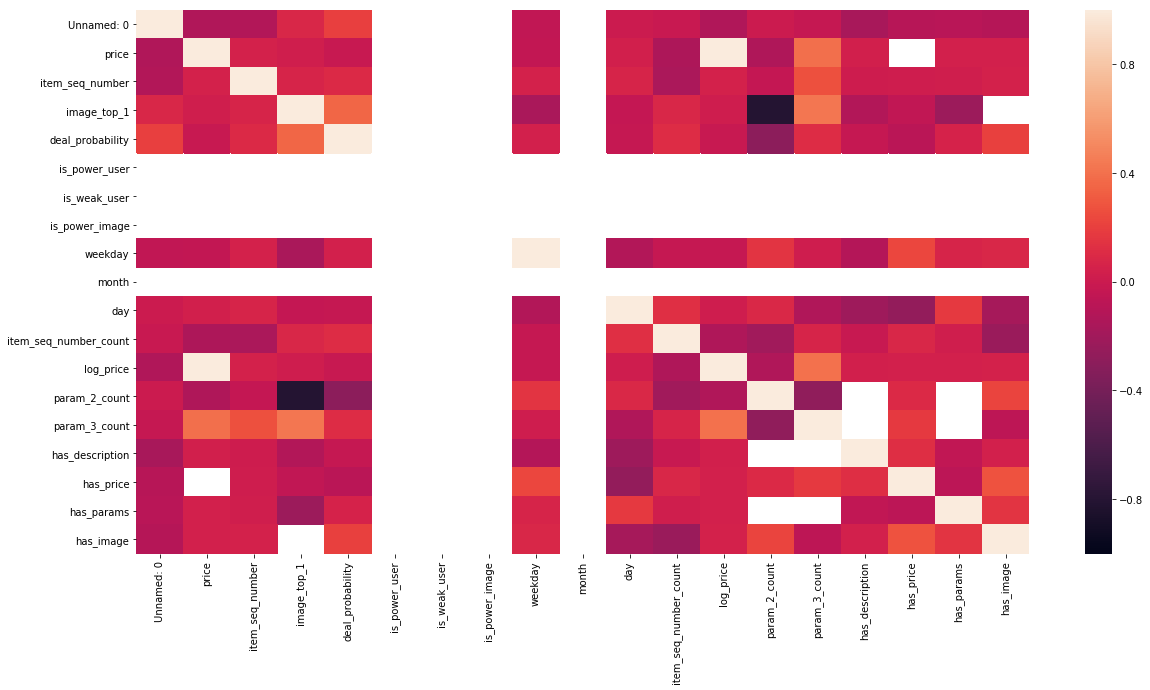

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,-0.129419,-0.119616,0.083454,0.196426,NaN,NaN,NaN,-0.051198,NaN,0.001015,-0.008674,-0.126044,0.001306,-0.027395,-0.164983,-0.099690,-0.091117,-0.104909
price,-0.129419,1.000000,0.052414,0.024031,-0.019315,NaN,NaN,NaN,-0.040183,NaN,0.036354,-0.146336,1.000000,-0.134974,0.394183,0.034869,NaN,0.045502,0.044690
item_seq_number,-0.119616,0.052414,1.000000,0.068472,0.096185,NaN,NaN,NaN,0.051668,NaN,0.066153,-0.152676,0.053319,-0.031558,0.266964,0.010739,0.023334,0.030526,0.054487
image_top_1,0.083454,0.024031,0.068472,1.000000,0.358934,NaN,NaN,NaN,-0.158168,NaN,-0.033614,0.085496,0.022252,-0.808762,0.426029,-0.119161,-0.048671,-0.223214,NaN
deal_probability,0.196426,-0.019315,0.096185,0.358934,1.000000,NaN,NaN,NaN,0.044981,NaN,-0.028361,0.113463,-0.022000,-0.296185,0.113319,-0.030726,-0.081532,0.058768,0.204333
is_power_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,-0.051198,-0.040183,0.051668,-0.158168,0.044981,NaN,NaN,NaN,1.000000,NaN,-0.120552,-0.023934,-0.027635,0.151321,0.018458,-0.114752,0.231362,0.068462,0.080839
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Spearman correlation:


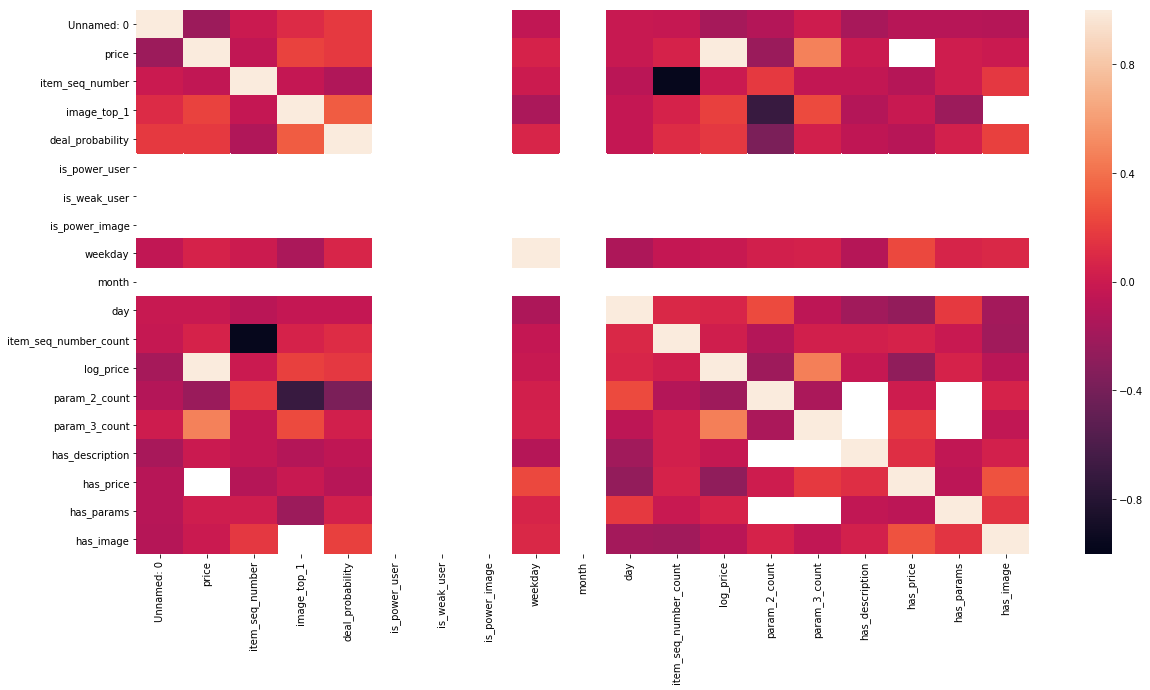

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,-0.221920,-0.006110,0.103547,0.174953,NaN,NaN,NaN,-0.047483,NaN,-0.018613,-0.025900,-0.177530,-0.112659,0.014498,-0.165370,-0.098036,-0.099522,-0.101717
price,-0.221920,1.000000,-0.050777,0.216024,0.172726,NaN,NaN,NaN,0.061400,NaN,-0.016208,0.058583,1.000000,-0.233835,0.473907,-0.002851,NaN,0.019021,-0.004719
item_seq_number,-0.006110,-0.050777,1.000000,-0.035245,-0.127102,NaN,NaN,NaN,0.002404,NaN,-0.082780,-0.974511,-0.000825,0.173294,-0.045943,-0.045159,-0.103617,0.020317,0.169749
image_top_1,0.103547,0.216024,-0.035245,1.000000,0.318508,NaN,NaN,NaN,-0.152273,NaN,-0.035104,0.060623,0.205351,-0.697423,0.244249,-0.114627,-0.014284,-0.219429,NaN
deal_probability,0.174953,0.172726,-0.127102,0.318508,1.000000,NaN,NaN,NaN,0.073099,NaN,-0.032037,0.113037,0.165960,-0.369357,0.033907,-0.060145,-0.095718,0.044454,0.205849
is_power_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,-0.047483,0.061400,0.002404,-0.152273,0.073099,NaN,NaN,NaN,1.000000,NaN,-0.146625,-0.034257,-0.020290,0.031942,0.053636,-0.108619,0.234532,0.065483,0.089049
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Kendal-tau correlation:


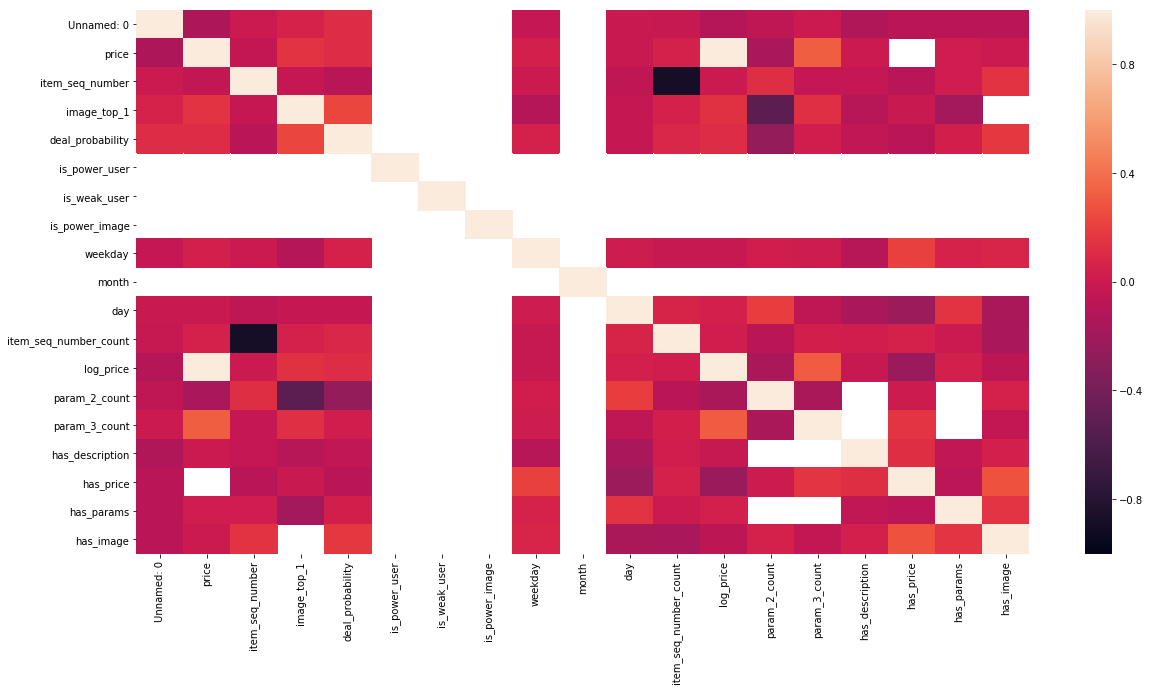

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,-0.146238,-0.001592,0.060191,0.111170,NaN,NaN,NaN,-0.032647,NaN,-0.009200,-0.023212,-0.115168,-0.060871,-0.003560,-0.135789,-0.080500,-0.081720,-0.083522
price,-0.146238,1.000000,-0.042520,0.142185,0.115688,NaN,NaN,NaN,0.040917,NaN,-0.011568,0.051813,1.000000,-0.170454,0.322994,-0.002362,NaN,0.015757,-0.003909
item_seq_number,-0.001592,-0.042520,1.000000,-0.026617,-0.087333,NaN,NaN,NaN,-0.003144,NaN,-0.060177,-0.888595,-0.005901,0.121009,-0.032421,-0.037608,-0.086289,0.016920,0.141362
image_top_1,0.060191,0.142185,-0.026617,1.000000,0.229653,NaN,NaN,NaN,-0.104933,NaN,-0.026840,0.051021,0.138466,-0.522538,0.130970,-0.094335,-0.011755,-0.180584,NaN
deal_probability,0.111170,0.115688,-0.087333,0.229653,1.000000,NaN,NaN,NaN,0.049998,NaN,-0.023627,0.080998,0.109759,-0.256884,0.025004,-0.049559,-0.078872,0.036630,0.169620
is_power_user,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,-0.032647,0.040917,-0.003144,-0.104933,0.049998,NaN,NaN,NaN,1.000000,NaN,0.009912,-0.016284,-0.017929,0.023818,0.011429,-0.094996,0.205117,0.057270,0.077881
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
print('deal_class_2 percentage of values: ', len(deal_class_2)/train.shape[0]*100, 'and mean price is: ', deal_class_2['price'].mean())
print('Pearson correlation:')
corr = deal_class_2.corr()
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Spearman correlation:')
corr = deal_class_2.corr('spearman')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Kendal-tau correlation:')
corr = deal_class_2.corr('kendall')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

deal_class_3 percentage of values:  2.8000000000000003 and mean price is:  211068.75
Pearson correlation:


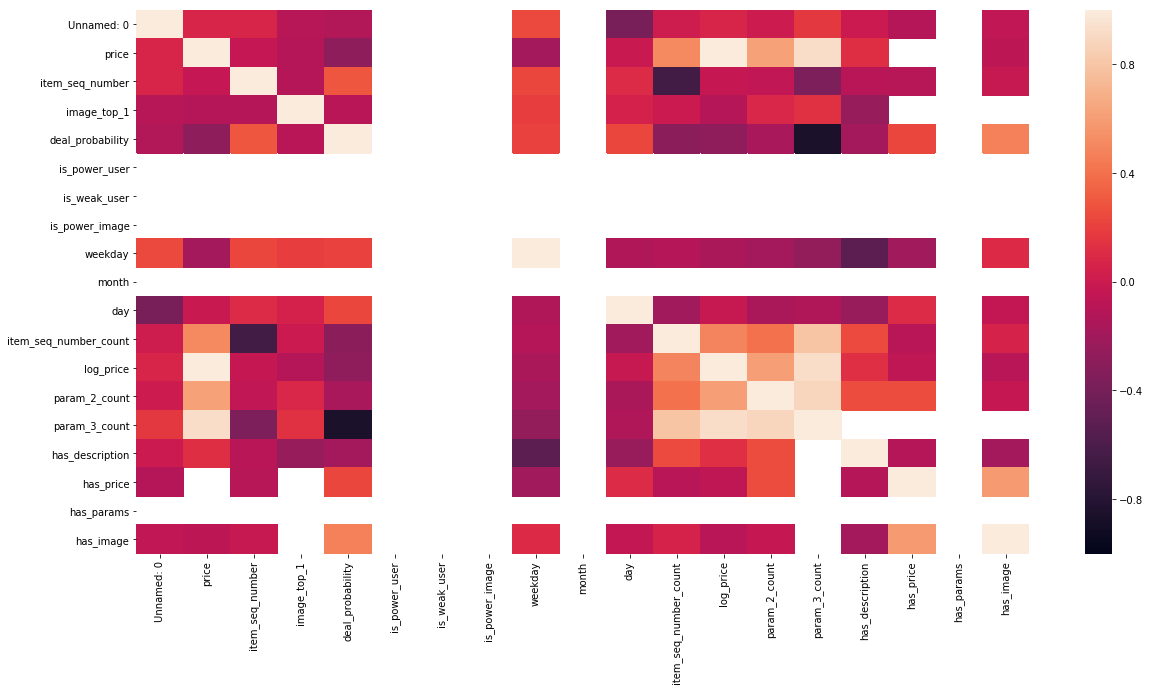

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,0.076170,0.072352,-0.100613,-0.121009,NaN,NaN,NaN,0.236989,NaN,-0.388583,0.007993,0.074606,0.002772,0.165616,-0.003920,-0.108193,NaN,-0.051207
price,0.076170,1.000000,-0.036622,-0.111434,-0.284166,NaN,NaN,NaN,-0.180908,NaN,-0.011478,0.514737,1.000000,0.624304,0.923935,0.121471,NaN,NaN,-0.068143
item_seq_number,0.072352,-0.036622,1.000000,-0.116032,0.290600,NaN,NaN,NaN,0.227389,NaN,0.102313,-0.642648,-0.024797,-0.051116,-0.360576,-0.088506,-0.101095,NaN,-0.018468
image_top_1,-0.100613,-0.111434,-0.116032,1.000000,-0.088598,NaN,NaN,NaN,0.194548,NaN,0.048251,-0.006416,-0.111434,0.080943,0.137197,-0.242464,NaN,NaN,NaN
deal_probability,-0.121009,-0.284166,0.290600,-0.088598,1.000000,NaN,NaN,NaN,0.217052,NaN,0.233860,-0.295931,-0.280296,-0.164996,-0.858609,-0.184147,0.227739,NaN,0.476138
is_power_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,0.236989,-0.180908,0.227389,0.194548,0.217052,NaN,NaN,NaN,1.000000,NaN,-0.133171,-0.116004,-0.158640,-0.189594,-0.263104,-0.515737,-0.197086,NaN,0.098447
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Spearman correlation:


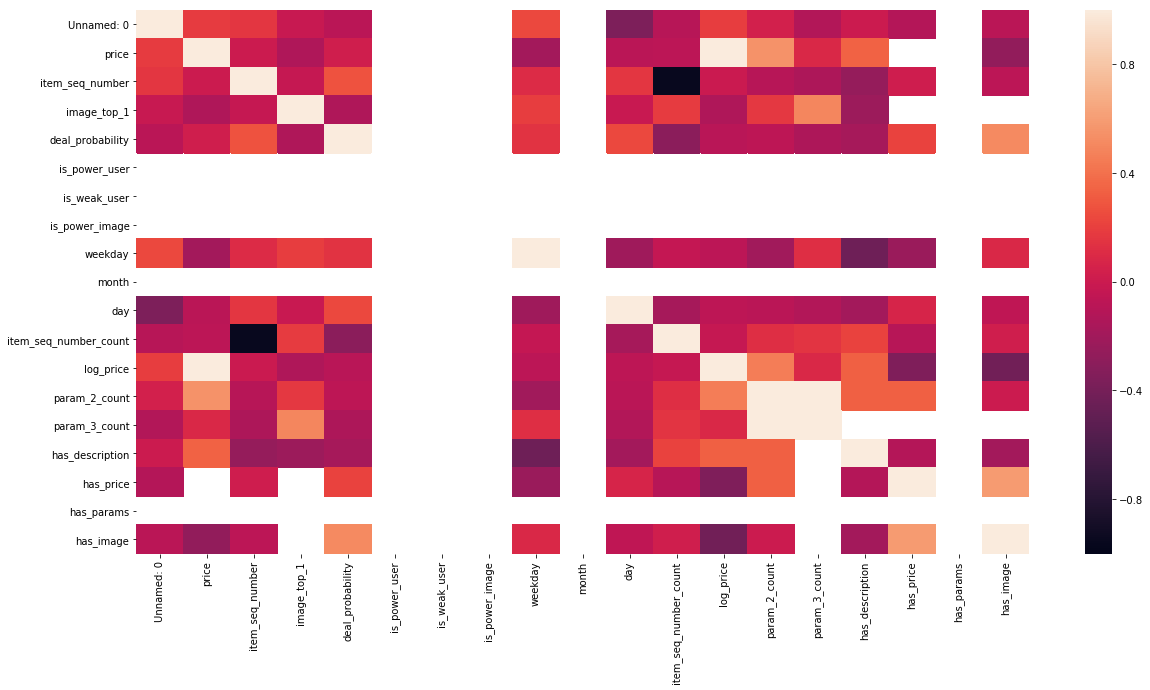

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,0.182333,0.159639,-0.016674,-0.080176,NaN,NaN,NaN,0.240320,NaN,-0.362866,-0.101235,0.192487,0.041979,-0.117698,0.000000,-0.113715,NaN,-0.080469
price,0.182333,1.000000,0.006532,-0.135325,0.025082,NaN,NaN,NaN,-0.194039,NaN,-0.085397,-0.070727,1.000000,0.548017,0.088273,0.337863,NaN,NaN,-0.267021
item_seq_number,0.159639,0.006532,1.000000,-0.031181,0.277199,NaN,NaN,NaN,0.109068,NaN,0.158961,-0.959925,-0.005350,-0.095600,-0.147122,-0.257654,0.018963,NaN,-0.071041
image_top_1,-0.016674,-0.135325,-0.031181,1.000000,-0.133981,NaN,NaN,NaN,0.187507,NaN,-0.010159,0.183783,-0.135325,0.164125,0.492592,-0.219275,NaN,NaN,NaN
deal_probability,-0.080176,0.025082,0.277199,-0.133981,1.000000,NaN,NaN,NaN,0.145171,NaN,0.237097,-0.301954,-0.091885,-0.066675,-0.147122,-0.172242,0.215503,NaN,0.508155
is_power_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,0.240320,-0.194039,0.109068,0.187507,0.145171,NaN,NaN,NaN,1.000000,NaN,-0.204586,-0.036473,-0.076257,-0.200855,0.119416,-0.437219,-0.231685,NaN,0.091619
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Kendal-tau correlation:


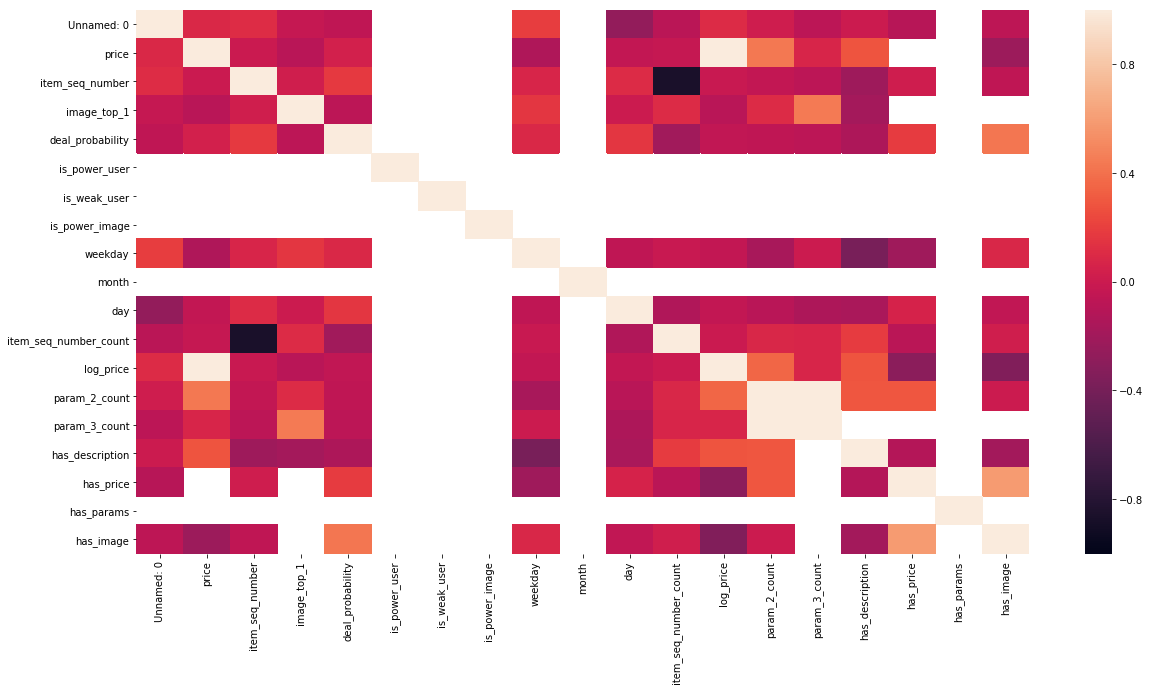

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,0.087594,0.111704,-0.023461,-0.056536,NaN,NaN,NaN,0.192343,NaN,-0.263181,-0.083688,0.101886,0.021031,-0.071611,0.000000,-0.094491,NaN,-0.066866
price,0.087594,1.000000,-0.003670,-0.088759,0.040666,NaN,NaN,NaN,-0.135640,NaN,-0.045565,-0.029854,1.000000,0.432334,0.071611,0.283368,NaN,NaN,-0.223953
item_seq_number,0.111704,-0.003670,1.000000,0.023599,0.175926,NaN,NaN,NaN,0.072153,NaN,0.104731,-0.865768,-0.010782,-0.042339,-0.071611,-0.215121,0.015833,NaN,-0.059314
image_top_1,-0.023461,-0.088759,0.023599,1.000000,-0.071650,NaN,NaN,NaN,0.158686,NaN,0.000000,0.108132,-0.088759,0.108197,0.444750,-0.184147,NaN,NaN,NaN
deal_probability,-0.056536,0.040666,0.175926,-0.071650,1.000000,NaN,NaN,NaN,0.087644,NaN,0.159022,-0.197803,-0.051842,-0.056266,-0.071611,-0.145172,0.181634,NaN,0.428291
is_power_user,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,0.192343,-0.135640,0.072153,0.158686,0.087644,NaN,NaN,NaN,1.000000,NaN,-0.056524,-0.011718,-0.046553,-0.165414,0.000000,-0.387004,-0.205076,NaN,0.081097
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [195]:
print('deal_class_3 percentage of values: ', len(deal_class_3)/train.shape[0]*100, 'and mean price is: ', deal_class_3['price'].mean())
print('Pearson correlation:')
corr = deal_class_3.corr()
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Spearman correlation:')
corr = deal_class_3.corr('spearman')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Kendal-tau correlation:')
corr = deal_class_3.corr('kendall')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

deal_class_4 percentage of values:  5.0 and mean price is:  107697.13333333333
Pearson correlation:


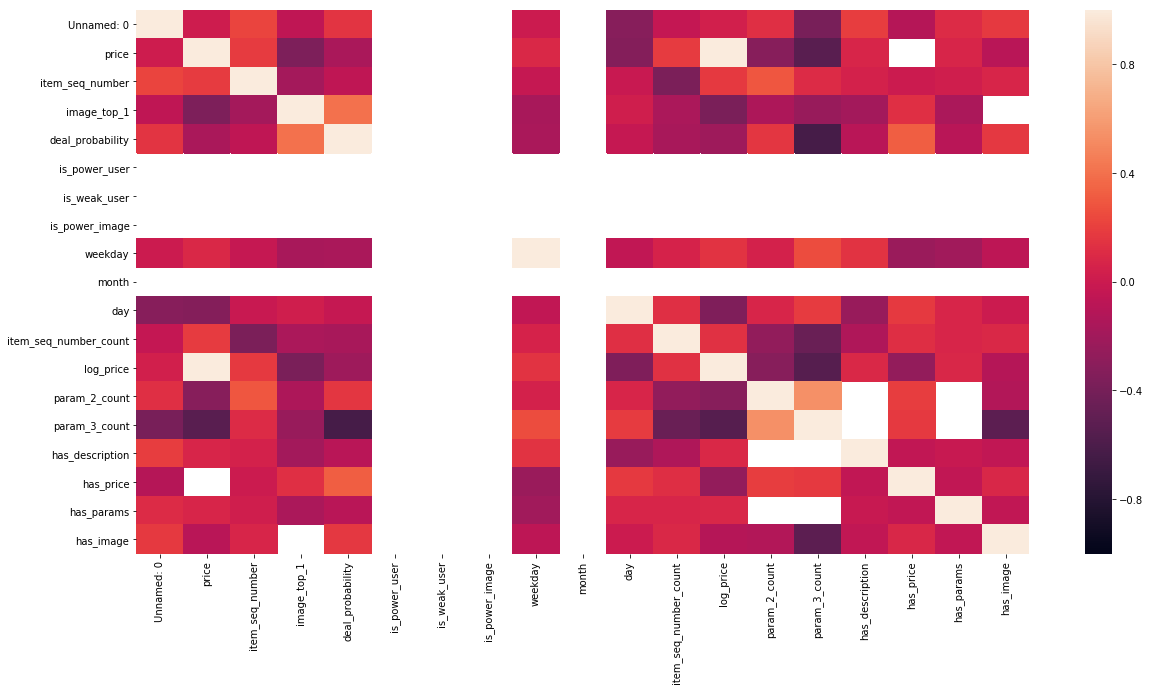

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,0.008186,0.223648,-0.060985,0.151110,NaN,NaN,NaN,0.003953,NaN,-0.319071,-0.038912,0.034867,0.132765,-0.389984,0.188992,-0.103877,0.102157,0.176422
price,0.008186,1.000000,0.183845,-0.359954,-0.156789,NaN,NaN,NaN,0.089745,NaN,-0.334822,0.181779,1.000000,-0.319330,-0.536739,0.076516,NaN,0.074934,-0.092682
item_seq_number,0.223648,0.183845,1.000000,-0.181968,-0.058372,NaN,NaN,NaN,-0.026607,NaN,-0.013054,-0.374551,0.174781,0.293356,0.103164,0.050242,0.003363,0.027665,0.077872
image_top_1,-0.060985,-0.359954,-0.181968,1.000000,0.404767,NaN,NaN,NaN,-0.165435,NaN,0.028315,-0.152158,-0.377071,-0.141537,-0.235011,-0.193428,0.131457,-0.152387,NaN
deal_probability,0.151110,-0.156789,-0.058372,0.404767,1.000000,NaN,NaN,NaN,-0.158209,NaN,-0.027901,-0.169088,-0.215619,0.157975,-0.629469,-0.092233,0.324416,-0.092233,0.167556
is_power_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,0.003953,0.089745,-0.026607,-0.165435,-0.158209,NaN,NaN,NaN,1.000000,NaN,-0.047818,0.057057,0.143248,0.051897,0.252112,0.146404,-0.233060,-0.195661,-0.063663
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Spearman correlation:


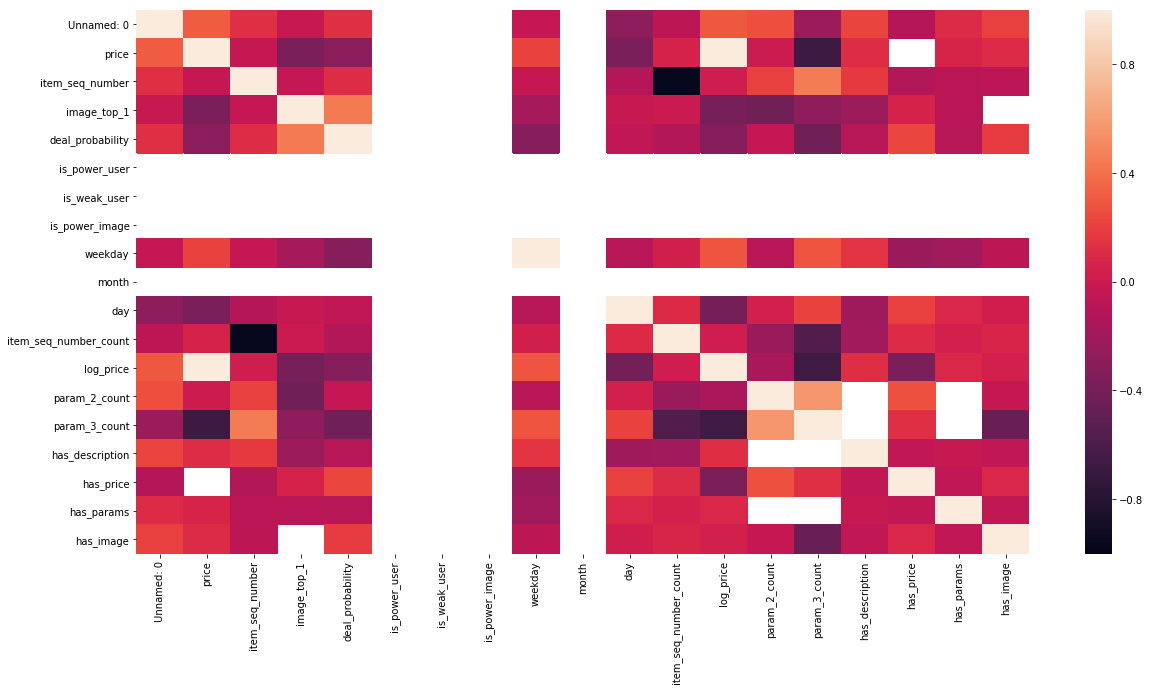

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,0.318925,0.128691,-0.022860,0.131228,NaN,NaN,NaN,-0.031714,NaN,-0.287184,-0.067831,0.302917,0.262556,-0.220968,0.222737,-0.103944,0.103944,0.204714
price,0.318925,1.000000,-0.030797,-0.381215,-0.295371,NaN,NaN,NaN,0.218482,NaN,-0.378064,0.062193,1.000000,0.002041,-0.683353,0.116111,NaN,0.069667,0.106199
item_seq_number,0.128691,-0.030797,1.000000,-0.033369,0.117089,NaN,NaN,NaN,-0.032517,NaN,-0.110616,-0.968491,0.016350,0.198949,0.449993,0.178322,-0.117891,-0.084208,-0.064021
image_top_1,-0.022860,-0.381215,-0.033369,1.000000,0.441064,NaN,NaN,NaN,-0.172612,NaN,-0.021984,-0.006857,-0.392877,-0.417216,-0.280939,-0.222430,0.056097,-0.090174,NaN
deal_probability,0.131228,-0.295371,0.117089,0.441064,1.000000,NaN,NaN,NaN,-0.324864,NaN,-0.054318,-0.121713,-0.326180,-0.033795,-0.419263,-0.096077,0.233620,-0.096077,0.180818
is_power_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,-0.031714,0.218482,-0.032517,-0.172612,-0.324864,NaN,NaN,NaN,1.000000,NaN,-0.096138,0.037970,0.281497,-0.093703,0.286297,0.145623,-0.234335,-0.195837,-0.064901
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Kendal-tau correlation:


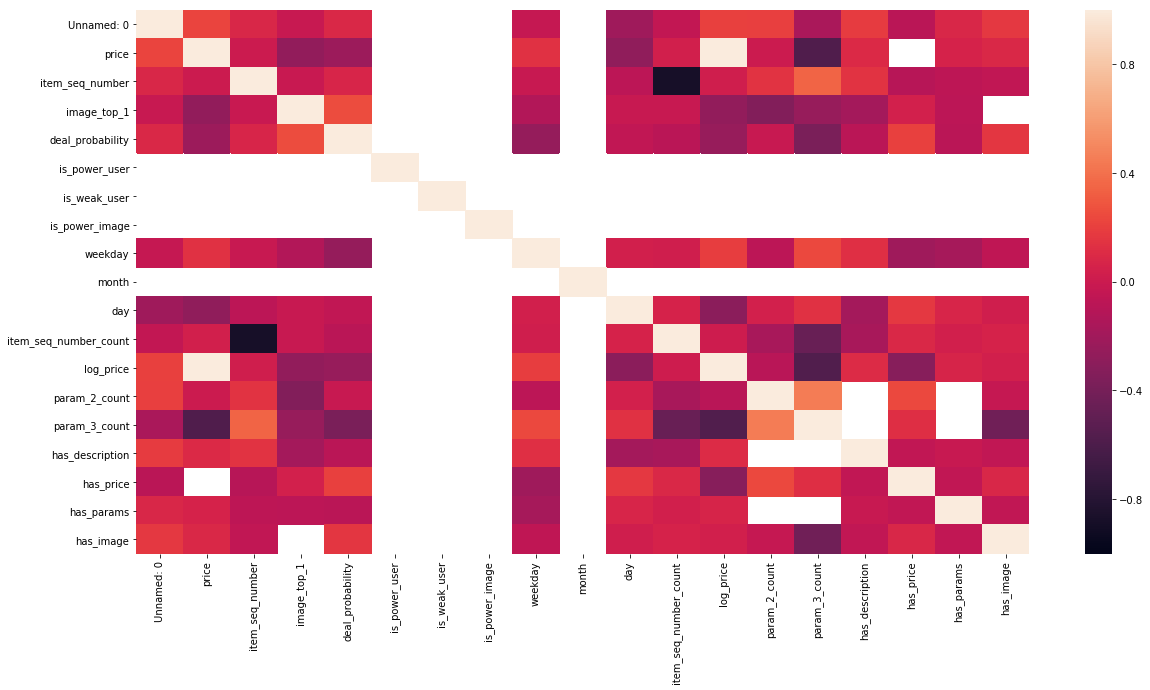

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,0.224026,0.079114,-0.016035,0.089525,NaN,NaN,NaN,-0.023818,NaN,-0.203269,-0.044176,0.205513,0.197263,-0.162615,0.183673,-0.085714,0.085714,0.168811
price,0.224026,1.000000,0.004094,-0.269723,-0.221246,NaN,NaN,NaN,0.140362,NaN,-0.277609,0.034149,1.000000,0.004809,-0.584187,0.096167,NaN,0.057700,0.087957
item_seq_number,0.079114,0.004094,1.000000,-0.009724,0.074271,NaN,NaN,NaN,-0.022264,NaN,-0.073532,-0.882682,0.027386,0.147848,0.346424,0.148338,-0.098068,-0.070048,-0.053256
image_top_1,-0.016035,-0.269723,-0.009724,1.000000,0.257143,NaN,NaN,NaN,-0.121756,NaN,-0.023342,-0.022914,-0.267603,-0.336309,-0.249568,-0.185523,0.046789,-0.075212,NaN
deal_probability,0.089525,-0.221246,0.074271,0.257143,1.000000,NaN,NaN,NaN,-0.256708,NaN,-0.049661,-0.080550,-0.246359,-0.019351,-0.379952,-0.084207,0.204756,-0.084207,0.158478
is_power_user,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,-0.023818,0.140362,-0.022264,-0.121756,-0.256708,NaN,NaN,NaN,1.000000,NaN,0.037525,0.027923,0.188328,-0.073680,0.241767,0.127912,-0.205836,-0.172020,-0.057007
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
print('deal_class_4 percentage of values: ', len(deal_class_4)/train.shape[0]*100, 'and mean price is: ', deal_class_4['price'].mean())
print('Pearson correlation:')
corr = deal_class_4.corr()
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Spearman correlation:')
corr = deal_class_4.corr('spearman')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Kendal-tau correlation:')
corr = deal_class_4.corr('kendall')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

deal_class_5 percentage of values:  6.800000000000001 and mean price is:  2096.516129032258
Pearson correlation:


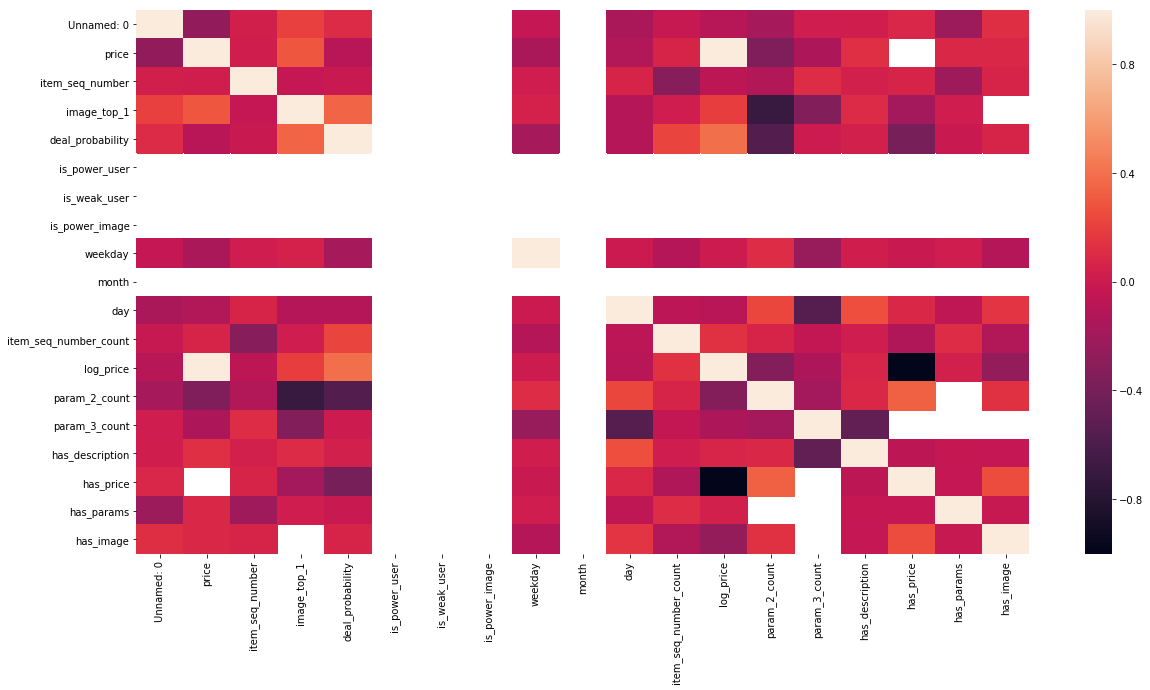

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,-0.271788,0.034778,0.210087,0.108852,NaN,NaN,NaN,-0.033841,NaN,-0.161838,-0.019167,-0.094634,-0.174099,0.019458,0.025149,0.085914,-0.222274,0.123373
price,-0.271788,1.000000,0.023814,0.293101,-0.093077,NaN,NaN,NaN,-0.155672,NaN,-0.121840,0.066944,1.000000,-0.354525,-0.144192,0.126562,NaN,0.090234,0.092218
item_seq_number,0.034778,0.023814,1.000000,-0.032442,-0.009357,NaN,NaN,NaN,0.020339,NaN,0.064047,-0.312640,-0.066555,-0.120239,0.110264,0.041844,0.067403,-0.214422,0.062725
image_top_1,0.210087,0.293101,-0.032442,1.000000,0.350638,NaN,NaN,NaN,0.047850,NaN,-0.109808,0.017518,0.194063,-0.697376,-0.343332,0.103872,-0.183741,0.021516,NaN
deal_probability,0.108852,-0.093077,-0.009357,0.350638,1.000000,NaN,NaN,NaN,-0.176191,NaN,-0.108632,0.226291,0.391661,-0.568902,0.000000,0.043775,-0.394579,-0.012394,0.066189
is_power_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,-0.033841,-0.155672,0.020339,0.047850,-0.176191,NaN,NaN,NaN,1.000000,NaN,-0.005298,-0.112799,0.005274,0.115033,-0.236036,0.027766,-0.010424,0.015790,-0.104994
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Spearman correlation:


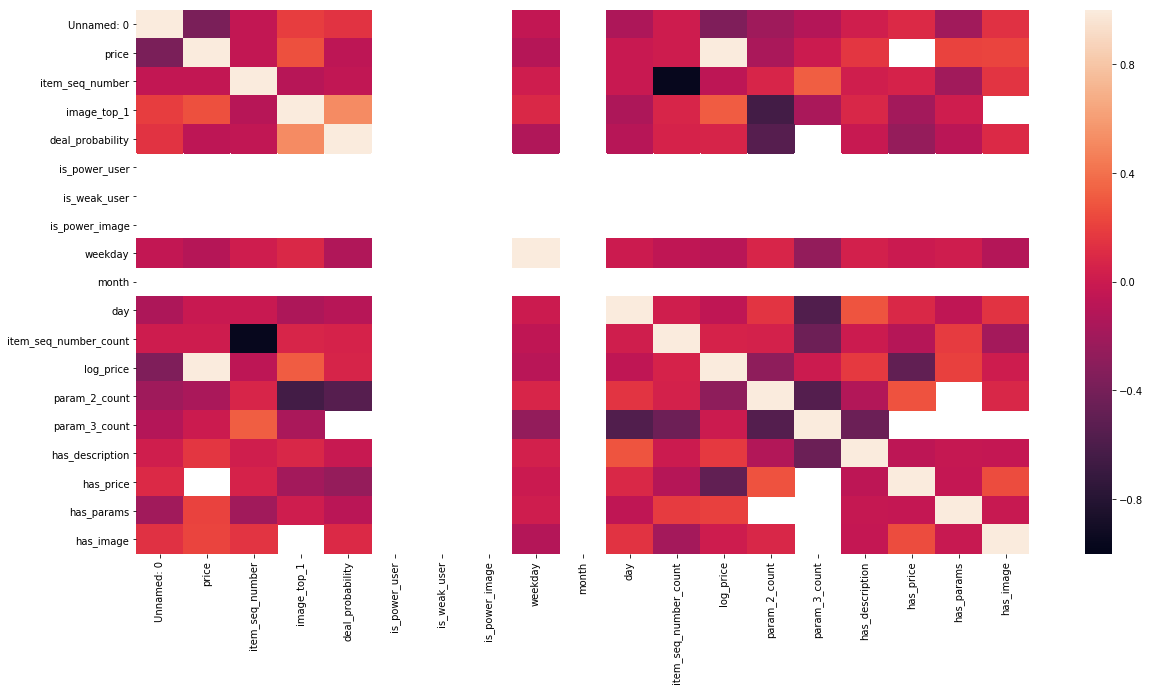

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,-0.375111,-0.041885,0.194054,0.147520,NaN,NaN,NaN,-0.041123,NaN,-0.148212,0.013501,-0.353604,-0.206430,-0.114156,0.023715,0.100379,-0.196066,0.133034
price,-0.375111,1.000000,-0.043045,0.269751,-0.064811,NaN,NaN,NaN,-0.108577,NaN,-0.014711,0.012876,1.000000,-0.158228,0.004789,0.162559,NaN,0.212175,0.219367
item_seq_number,-0.041885,-0.043045,1.000000,-0.098145,-0.050735,NaN,NaN,NaN,0.022151,NaN,-0.009702,-0.962529,-0.065927,0.073380,0.320367,0.027370,0.060770,-0.196113,0.148590
image_top_1,0.194054,0.269751,-0.098145,1.000000,0.515686,NaN,NaN,NaN,0.086642,NaN,-0.145071,0.071522,0.313563,-0.645821,-0.160550,0.078284,-0.187880,0.022791,NaN
deal_probability,0.147520,-0.064811,-0.050735,0.515686,1.000000,NaN,NaN,NaN,-0.127386,NaN,-0.098161,0.060348,0.069180,-0.553687,NaN,-0.017195,-0.257286,-0.078226,0.097530
is_power_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,-0.041123,-0.108577,0.022151,0.086642,-0.127386,NaN,NaN,NaN,1.000000,NaN,0.003721,-0.059584,-0.088053,0.075578,-0.259538,0.042462,-0.005347,0.018898,-0.109951
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Kendal-tau correlation:


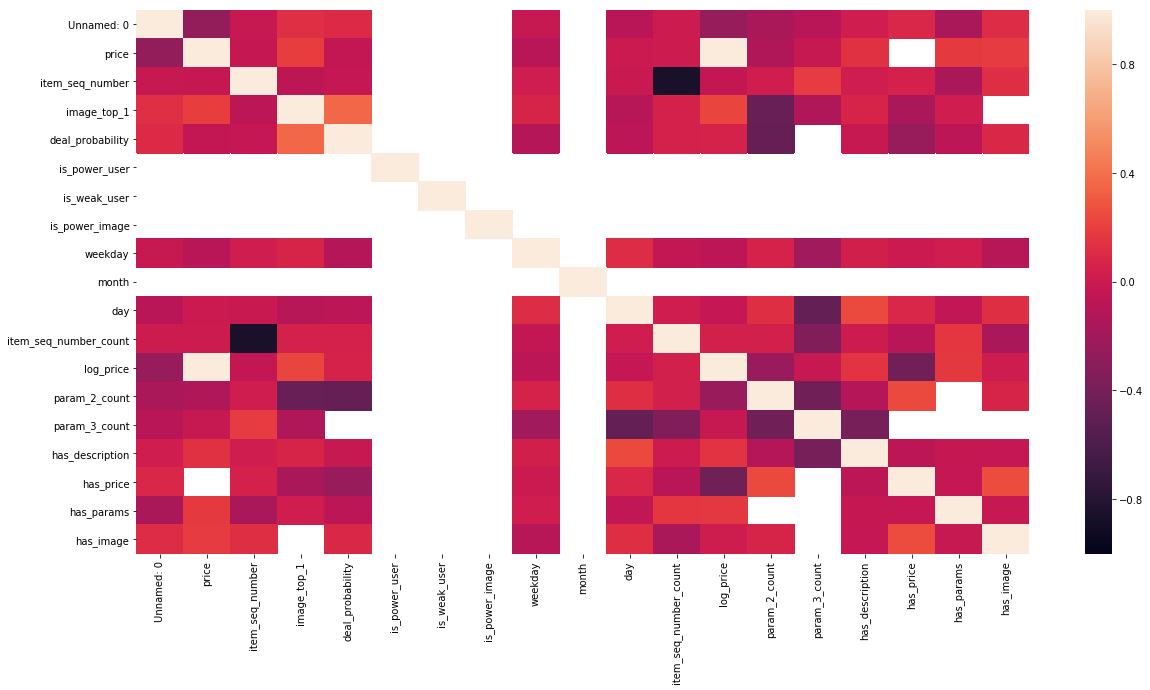

,Unnamed: 0,price,item_seq_number,image_top_1,deal_probability,is_power_user,is_weak_user,is_power_image,weekday,month,day,item_seq_number_count,log_price,param_2_count,param_3_count,has_description,has_price,has_params,has_image
Unnamed: 0,1.000000,-0.259449,-0.022492,0.129937,0.101333,NaN,NaN,NaN,-0.021759,NaN,-0.093607,0.005427,-0.249311,-0.149322,-0.092608,0.019505,0.082559,-0.161260,0.109418
price,-0.259449,1.000000,-0.026829,0.192735,-0.043948,NaN,NaN,NaN,-0.088116,NaN,-0.002259,0.003368,1.000000,-0.137935,-0.020477,0.137181,NaN,0.179051,0.185121
item_seq_number,-0.022492,-0.026829,1.000000,-0.068529,-0.038048,NaN,NaN,NaN,0.017108,NaN,-0.014608,-0.862414,-0.043106,0.022793,0.186924,0.022610,0.050202,-0.162008,0.122750
image_top_1,0.129937,0.192735,-0.068529,1.000000,0.360057,NaN,NaN,NaN,0.066434,NaN,-0.094271,0.052551,0.224225,-0.468663,-0.132075,0.064559,-0.154940,0.018795,NaN
deal_probability,0.101333,-0.043948,-0.038048,0.360057,1.000000,NaN,NaN,NaN,-0.102571,NaN,-0.075756,0.048511,0.062133,-0.475392,NaN,-0.015743,-0.235562,-0.071620,0.089295
is_power_user,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_weak_user,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_power_image,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weekday,-0.021759,-0.088116,0.017108,0.066434,-0.102571,NaN,NaN,NaN,1.000000,NaN,0.113594,-0.042886,-0.071053,0.059033,-0.202527,0.037184,-0.004682,0.016549,-0.096285
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [197]:
print('deal_class_5 percentage of values: ', len(deal_class_5)/train.shape[0]*100, 'and mean price is: ', deal_class_5['price'].mean())
print('Pearson correlation:')
corr = deal_class_5.corr()
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Spearman correlation:')
corr = deal_class_5.corr('spearman')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)
print('Kendal-tau correlation:')
corr = deal_class_5.corr('kendall')
sns.heatmap(corr,vmin = -1, vmax = 1, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()
display(corr)

First we notice that 80% of the items have very low deal probability(0-0.2).

We can see that as the probability increases - the mean price drops significantly (which is reasonable).

We can also see that there is an interesting correlation between the image_top_1 feature and the target variable which is the highest(0.4) for the class of 0.8-1.0 deal probability.

There is also some correlation between the price feature and the target variable and it is different between the classes - for the lowest probability class and the highest probability class it is positive (0.21,0.1), for the second and third class it is close to 0 and for the 4th class it is strictly negative(-0.27).

We can also see some mostly negative correlation between the item_seq_number,has_params/image/description/price features and the target variable in the highest probability class.

Finally we can see that there is a constant correlation of about 0.2 between has_price and has_image.

## train_active.csv

Some minor exploration of the train_active dataset.
<br>The file is very big so we take only a sample from it.</br>

In [232]:
train_active = pd.read_csv(os.path.join(DATA_PATH, 'train_active.csv'), parse_dates=['activation_date'])

In [235]:
train_active.columns

Index(['Unnamed: 0', 'item_id', 'user_id', 'region', 'city',
       'parent_category_name', 'category_name', 'param_1', 'param_2',
       'param_3', 'title', 'description', 'price', 'item_seq_number',
       'activation_date', 'user_type'],
      dtype='object')

In [237]:
np.sum(train_active.isnull())/train_active.shape[0]*100

Unnamed: 0               0.000
item_id                  0.000
user_id                  0.000
region                   0.517
city                     0.517
parent_category_name     0.517
category_name            0.517
param_1                  4.412
param_2                 42.729
param_3                 57.893
title                    0.528
description              4.321
price                    2.529
item_seq_number          0.927
activation_date          0.927
user_type                0.927
dtype: float64

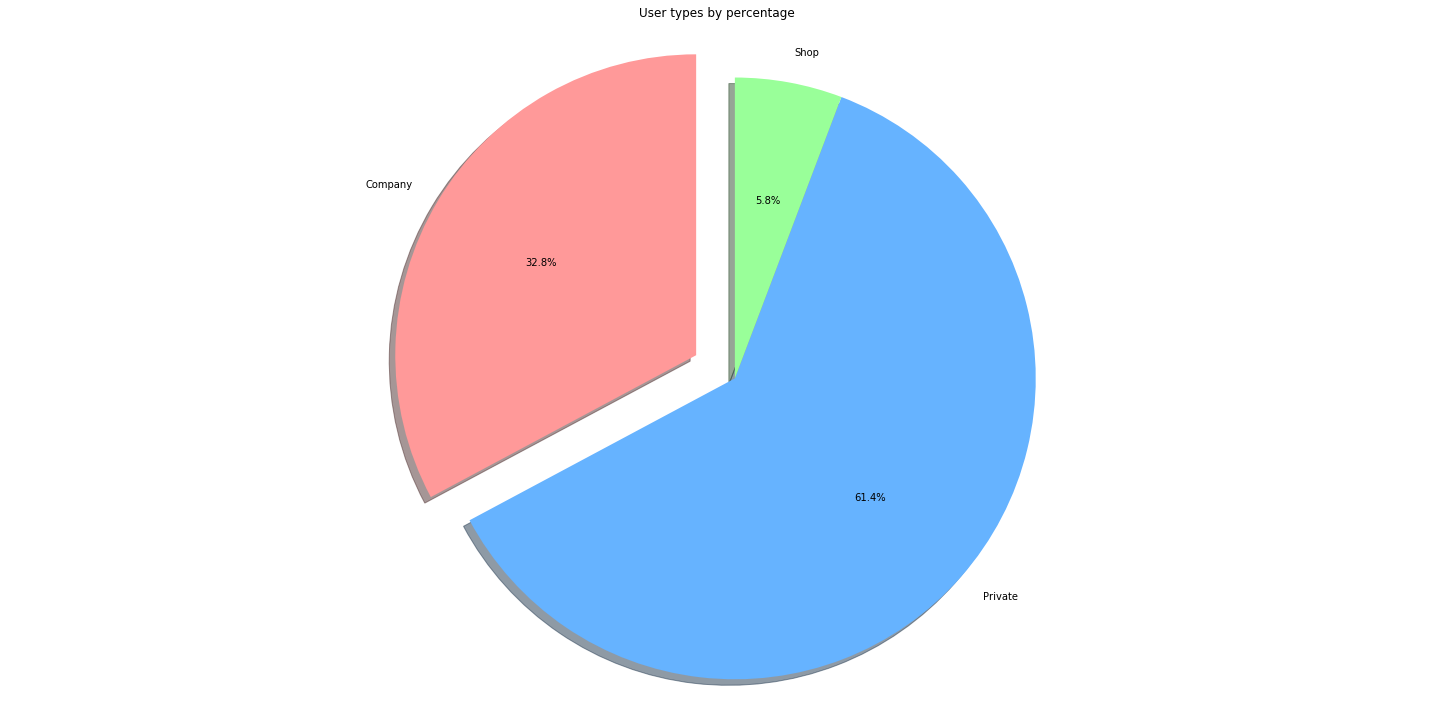

In [238]:
user_type_dist = train_active.groupby('user_type').size()
explode = (0.15, 0, 0)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
labels = user_type_dist.index
fig1, ax1 = plt.subplots()
ax1.pie(user_type_dist, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.title('User types by percentage')
plt.show()

/Users/ilaif/.virtualenvs/ds/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



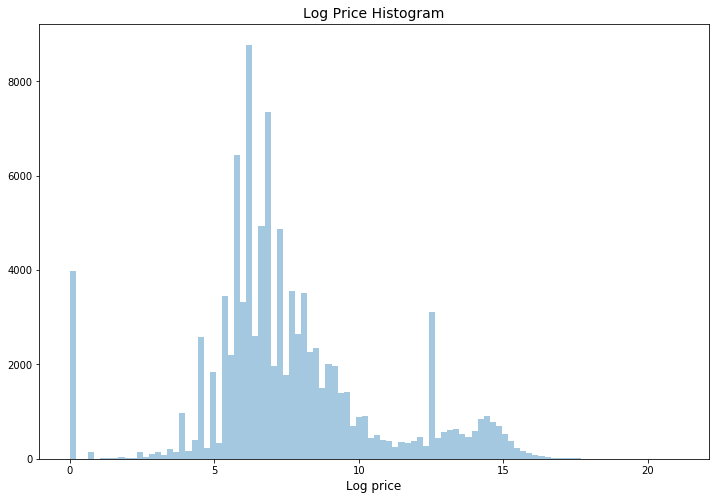

In [239]:
train_active['log_price'] = train_active['price']
train_active['log_price'].fillna(np.nanmean(train_active['price']), inplace=True)
plt.figure(figsize=(12,8))
sns.distplot(np.log1p(train_active['log_price'].values), bins=100, kde=False)
plt.xlabel('Log price', fontsize=12)
plt.title('Log Price Histogram', fontsize=14)
plt.show()

## periods_train.csv

Minor exploration of the periods_train dataset.

In [241]:
periods_train = pd.read_csv(os.path.join(DATA_PATH, 'periods_train.csv.zip'), parse_dates=['activation_date','date_from','date_to'])

In [242]:
periods_train.columns

Index(['item_id', 'activation_date', 'date_from', 'date_to'], dtype='object')

In [243]:
periods_train.describe()

,item_id,activation_date,date_from,date_to
count,16687412,16681622,16687412,16687412
unique,13812546,87,14,14
top,c5bc9e0c5700,2017-03-13 00:00:00,2017-03-15 00:00:00,2017-03-28 00:00:00
freq,14,539502,12070638,11221144
first,NaN,2017-01-01 00:00:00,2017-03-15 00:00:00,2017-03-15 00:00:00
last,NaN,2017-03-28 00:00:00,2017-03-28 00:00:00,2017-03-28 00:00:00


In [244]:
periods_train.shape

(16687412, 4)

## Relation between test and train

Taken from here: https://www.kaggle.com/bminixhofer/aggregated-features-lightgbm/notebook

In [245]:
test = pd.read_csv(os.path.join(DATA_PATH, 'test.csv'), parse_dates=['activation_date'])

In [247]:
# !pip install matplotlib_venn
from matplotlib_venn import venn2, venn2_circles
def get_venn(feature):
    venn2([
        set(train[feature].values), 
        set(test[feature].values)
    ], set_labels = ('train', 'test'))

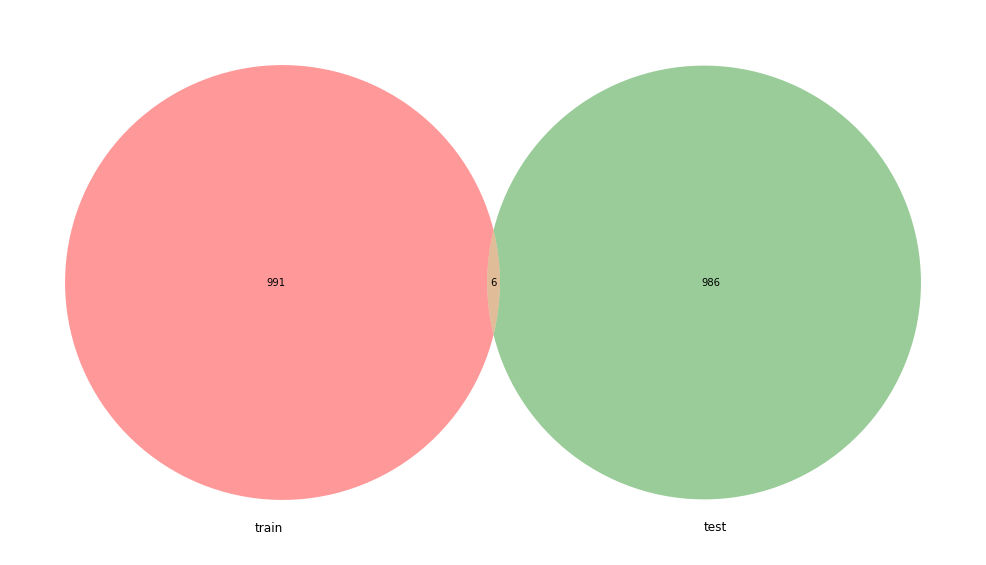

In [248]:
get_venn('user_id')

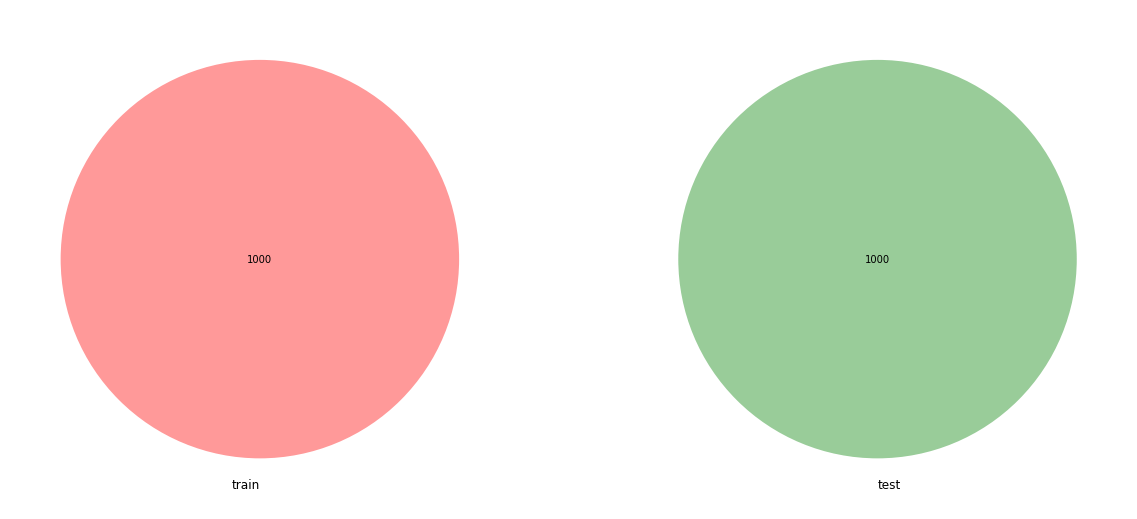

In [249]:
get_venn('item_id')

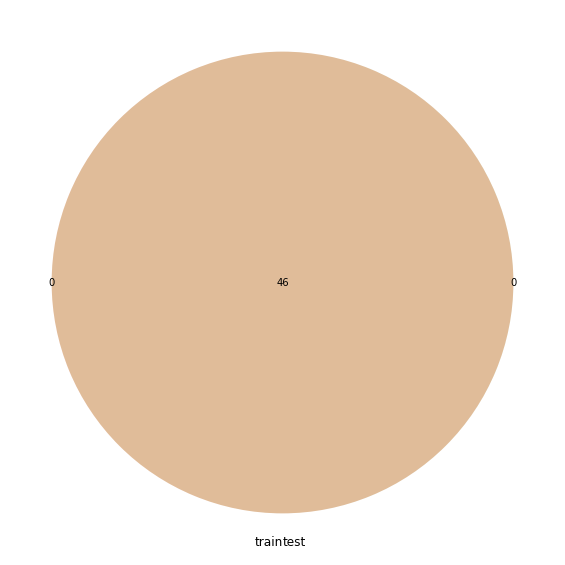

In [250]:
get_venn('category_name')

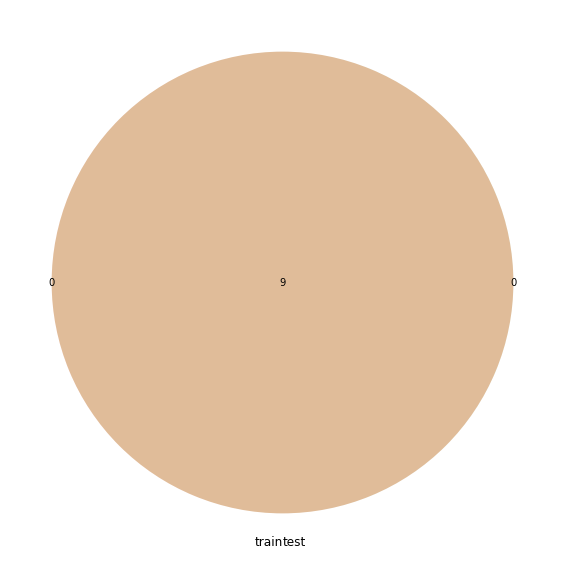

In [251]:
get_venn('parent_category_name')

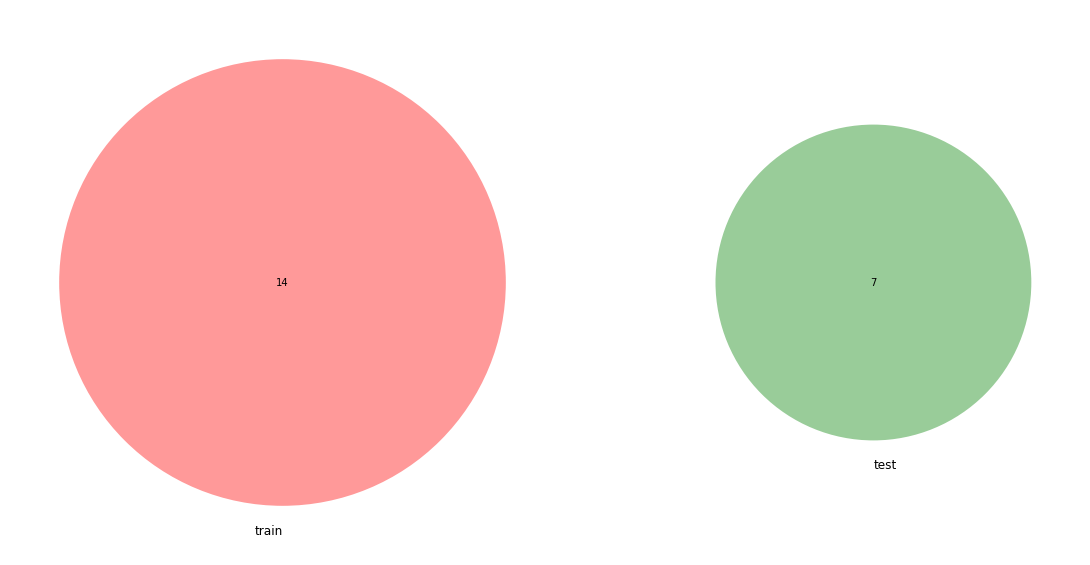

In [252]:
get_venn('activation_date')

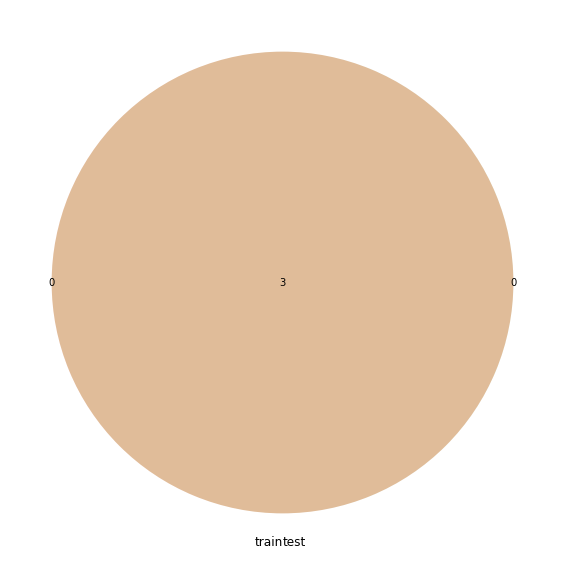

In [253]:
get_venn('user_type')

We can see that the train and test datasets has the same categories and user types.
<br>There are some overlaping user_id's, so it might be helpfull to include the user_id in the prediction model.</br>
<br>Finally, we can see that the item_id and activation_date are completly different between the two datasets, so it might not be a good idea to include them in the prediction model.</br>